# <font color='blue'>Assignment: MSE-vs-MAE</font>

In the lecture, we have seen that `Mean Absolute Error` (`MAE`) is more robust to outlier compare to `Mean Square Error` (`MSE`). In this assignment, we have to be a witness to this theory. 

Although we have an intuition that it is bound to happen because the cost of outliers is much more in `MSE` compare to `MAE`. Let's implement and witness it. 

**In this assignment, you have to implement the following:**

- `Mean Square Error (MSE)`


- `Mean Absolute Error (MAE)`


- The gradient with respect to `m` and `c`, when the loss function is `MSE`


- The gradient with respect to `m` and `c`, when the loss function is `MAE`

Codes for training and visualization is already in the notebook.

## <font color='blue'>Marking Scheme</font>

#### Maximum Points: 30

<div>
    <table>
        <tr><td><h3>Sr. no.</h3></td> <td><h3>Problem</h3></td> <td><h3>Points</h3></td> </tr>
        <tr><td><h3>1</h3></td> <td><h3>Mean Square Error (MSE)</h3></td> <td><h3>5</h3></td> </tr>
        <tr><td><h3>2</h3></td> <td><h3>Mean Absolute Error (MAE)</h3></td> <td><h3>5</h3></td> </tr>
        <tr><td><h3>3</h3></td> <td><h3>Gradients for MSE</h3></td> <td><h3>10</h3></td> </tr>
        <tr><td><h3>4</h3></td> <td><h3>Gradients for MAE</h3></td> <td><h3>10</h3></td> </tr>
    </table>
</div>


In [1]:
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [2]:
import torch
import matplotlib.pyplot as plt

from collections import defaultdict


plt.style.use('ggplot')

torch.manual_seed(0)

In [3]:
plt.rcParams["figure.figsize"] = (15, 8)

# <font style="color:green">1. Generate Data </font>
We will generate 1000 data points for the experiment. The `x-axis` is the independent variable which has values randomly distributed between -5 to 5. We assume some values for m and c to create the data points for the dependent variable ( `y-axis` ). We also add some randomness so that the y values are different for the same x. 

Now, we have a simple dataset which has been generated using a linear model in the presence of noise. We have also converted five percent of data into outliers to observe the performance difference between MSE and MAE at the time of training. The data has been dispayed using the scatter plot.

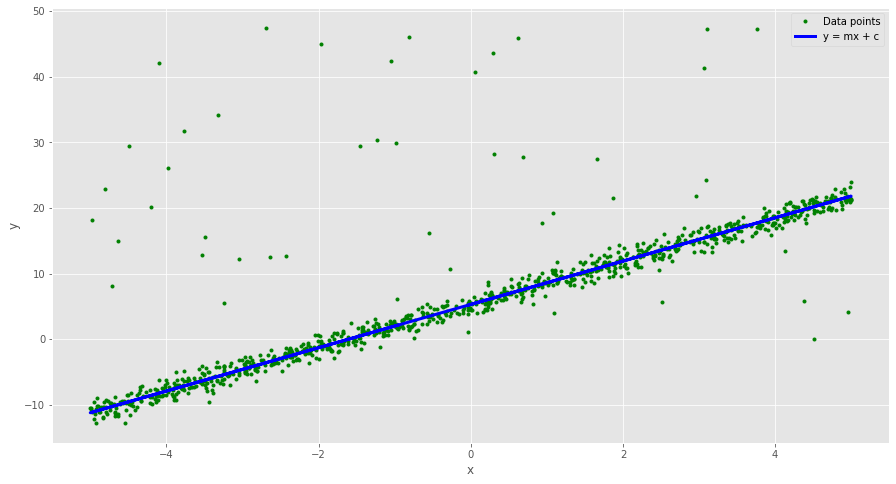

In [4]:
# Generating y = mx + c + random noise
num_data = 1000

# True values of m and c
m_line = 3.3
c_line = 5.3

# input (Generate random data between [-5,5])
x = 10 * torch.rand(num_data) - 5

# Output (Generate data assuming y = mx + c + noise)
y_label = m_line * x + c_line + torch.randn_like(x)

# Add a few outlier
num_outliers = int(0.05 * num_data)
random_index = torch.randint(num_data, (num_outliers,))
y_label[random_index] = 50 * torch.rand(len(random_index))

y = m_line * x + c_line

# Plot the generated data points 
plt.plot(x, y_label, '.', color='g', label="Data points")
plt.plot(x, y, color='b', label='y = mx + c', linewidth=3)
plt.ylabel('y')
plt.xlabel('x')
plt.legend()
plt.show()

# <font style="color:green">2. Problem Formulation</font>

The goal is to predict $y$ given some value of $x$. To do this we will fit a line that goes through the data points $(x_i, y_i)$. The equation for such a line is 

$$
y = mx + c
$$

We have a set of data points $(x_i, y_i)$, and they should all satisfy the equation above. i.e., 

$$
y_i = m x_i + c
$$

Unless we have perfect data with no noise, even the best $m$ and $c$ we can find will not perfectly fit the data. So, we will have an **error** or a **residual** given by

$$
e_i = (y_i - m x_i -c) 
$$

We want to find a value of $m$ and $c$ that minimizes the error above. Positive or negative values of error are equally bad for us. So, we are interested in minimizing the square or absolute of the error above. We will see the mean square error (`MSE`) and mean absolute error (`MAE`) and their gradients with respect to m and c. 

# <font style="color:green">3. Loss Functions and their Gradients wrt Learning Parameters.</font>

We need a loss function that can be optimized using gradient descent and updating learnable parameters. Here, we will use two types of loss functions and see which is performing better in the case of outliers in the training data. 


## <font style="color:green">3.1. Mean Square Error (MSE)</font>

**The `mean squared error (MSE)` function which is given by:**

$$
l_{mse} = \frac{1}{N}\sum^N_{i=1}(y_i - m x_i -c)^2 \\
$$

**Take partial derivatives w.r.t `m` and `c` respectively:**

$$
\begin{align}
\frac{\partial l_{mse}}{\partial m}  &= -\frac{2}{N} \sum^N_{i=1} x_i(y_i - m x_i - c) \\
\frac{\partial l_{mse}}{\partial c}  &= -\frac{2}{N} \sum^N_{i=1} (y_i - m x_i - c) \\
\end{align}
$$

To follow the slope of the curve, we need to move `m` in the direction of negative gradient. However, we need to control the rate at which we go down the slope so that we do not overshoot the minimum. So we use a parameter $\lambda$ called the `learning rate`. 

**Update rule of `m` and `c` using gradient descent:**

$$
\begin{align}
m_k &= m_{k-1} - \lambda \frac{\partial l_{mse}}{\partial m} \\
c_k &= c_{k-1} - \lambda \frac{\partial l_{mse}}{\partial c} \\ 
\end{align}
$$


## <font style="color:green">3.2. Mean Absolute Error (MAE)</font>

**The `mean absolute error (MAE)` function which is given by:**

$$
l_{mae} = \frac{1}{N}\sum^N_{i=1}|y_i - m x_i -c|
$$

**The above function can be re-written as the following:**

$$
l_{mae} = \frac{1}{N}\sum^N_{i=1}sign(y_i - m x_i -c)\cdot (y_i - m x_i -c)\\
$$

Where,

\begin{equation}
  sign(\alpha) =
    \begin{cases}
      1 & \text{if  $\alpha > 0$}\\
      -1 & \text{if  $\alpha < 0$}\\
      0 & \text{otherwise}
    \end{cases}       
\end{equation}

**Take partial derivatives w.r.t `m` and `c` respectively:**

$$
\begin{align}
\frac{\partial l_{mae}}{\partial m}  &= \frac{1}{N} \sum^N_{i=1} sign(y_i - m x_i -c)\cdot (- x_i) \\
                                     &= -\frac{1}{N} \sum^N_{i=1} sign(y_i - m x_i -c)\cdot x_i \\
\frac{\partial l_{mae}}{\partial c}  &= \frac{1}{N} \sum^N_{i=1} sign(y_i - m x_i -c)\cdot (-1) \\
                                     &= -\frac{1}{N} \sum^N_{i=1} sign(y_i - m x_i -c) \\
\end{align}
$$

**Update rule of `m` and `c` using gradient descent:**

$$
\begin{align}
m_k &= m_{k-1} - \lambda \frac{\partial l_{mae}}{\partial m} \\
c_k &= c_{k-1} - \lambda \frac{\partial l_{mae}}{\partial c} \\ 
\end{align}
$$



# <font style="color:green">4. Implementation</font>

## <font style="color:green">4.1. Mean Square Error (MSE) [5 Points]</font>

In [7]:
def MSE_loss(inputs, label, m, c):
    '''
    All arguments are defined in the training section of this notebook. 
    This function will be called from the training section.  
    So before completing this function go through the whole notebook.
    
    inputs (torch.tensor): input (X)
    labels (torch.tensor): label (Y)
    m (float): slope of the line
    c (float): vertical intercept of line
    '''
    
    # Mean square error (loss)
    loss = None
    
    N = len(inputs)
    l = label - m*inputs - c
    loss = torch.sum(l*l)/N
    
    return loss
    

**Test your code before submitting it using the below code cell.**

For given input:
```
X = torch.tensor([-0.0374,  2.6822, -4.1152])
Y = torch.tensor([ 5.1765, 14.1513, -8.2802])
m = 2
c = 3
```
Output:
```
Mean square error (MSE): 15.95
```

In [8]:
X = torch.tensor([-0.0374,  2.6822, -4.1152])
Y = torch.tensor([ 5.1765, 14.1513, -8.2802])
m = 2
c = 3

mse_loss = MSE_loss(X, Y, m, c)

print('Mean square error (MSE): {0:.2f}'.format(mse_loss))

Mean square error (MSE): 15.95


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


## <font style="color:green">4.2. Mean Absolute Error (MAE) [5 Points]</font>

In [9]:
def MAE_loss(inputs, label, m, c):
    '''
    All arguments are defined in the training section of this notebook. 
    This function will be called from the training section.  
    So before completing this function go through the whole notebook.
    
    inputs (torch.tensor): input (X)
    labels (torch.tensor): label (Y)
    m (float): slope of the line
    c (float): vertical intercept of line
    '''
    
    # Mean absolute error (loss)
    loss = None
    
    N = len(inputs)
    l = label - m*inputs - c
    loss = torch.sum(torch.abs(l))/N
    return loss
    

**Test your code before submitting it using the below code cell.**

For given input:
```
X = torch.tensor([-0.0374,  2.6822, -4.1152])
Y = torch.tensor([ 5.1765, 14.1513, -8.2802])
m = 2
c = 3
```
Output:
```
Mean absolute error (MAE): 3.70
```

In [10]:
X = torch.tensor([-0.0374,  2.6822, -4.1152])
Y = torch.tensor([ 5.1765, 14.1513, -8.2802])
m = 2
c = 3

mae_loss = MAE_loss(X, Y, m, c)

print('Mean absolute error (MAE): {0:.2f}'.format(mae_loss))

Mean absolute error (MAE): 3.70


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


## <font style="color:green">4.3. Gradients for MSE [10 Points]</font>

In [15]:
def gradient_wrt_m_and_c_mse(inputs, labels, m, c):
    
    '''
    All arguments are defined in the training section of this notebook. 
    This function will be called from the training section.  
    So before completing this function go through the whole notebook.
    
    inputs (torch.tensor): input (X)
    labels (torch.tensor): label (Y)
    m (float): slope of the line
    c (float): vertical intercept of line
    '''
    # gradient w.r.t to m is g_m 
    g_m = None
    
    # gradient w.r.t to c is g_c
    g_c = None
    
    N = len(inputs)
    l = labels - m*inputs - c
    g_m = -2*torch.sum(inputs*l)/N
    g_c = -2*torch.sum(l)/N
    
    return g_m, g_c

**Test your code before submitting it using the below code cell.**

For given input:
```
X = torch.tensor([-0.0374,  2.6822, -4.1152])
Y = torch.tensor([ 5.1765, 14.1513, -8.2802])
m = 2
c = 3
```
Output:
```
Gradient wrt m (for MSE): -18.66
Gradient wrt c (for MSE): -3.33
```

In [16]:
X = torch.tensor([-0.0374,  2.6822, -4.1152])
Y = torch.tensor([ 5.1765, 14.1513, -8.2802])
m = 2
c = 3

gm, gc = gradient_wrt_m_and_c_mse(X, Y, m, c)

print('Gradient wrt m (for MSE): {0:.2f}'.format(gm))
print('Gradient wrt c (for MSE): {0:.2f}'.format(gc))    

Gradient wrt m (for MSE): -18.66
Gradient wrt c (for MSE): -3.33


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


## <font style="color:green">4.4. Gradients for MAE [10 Points]</font>

In [19]:
def gradient_wrt_m_and_c_mae(inputs, labels, m, c):
    
    '''
    All arguments are defined in the training section of this notebook. 
    This function will be called from the training section.  
    So before completing this function go through the whole notebook.
    
    inputs (torch.tensor): input (X)
    labels (torch.tensor): label (Y)
    m (float): slope of the line
    c (float): vertical intercept of line
    '''
    
    # gradient w.r.t to m is g_m 
    g_m = None
    
    # gradient w.r.t to c is g_c
    g_c = None
    
    N = len(inputs)
    l = labels - m*inputs - c
    g_m = -torch.sum(torch.sign(l)*inputs)/N
    g_c = -torch.sum(torch.sign(l))/N
    
    return g_m, g_c
    

**Test your code before submitting it using the below code cell.**

For given input:
```
X = torch.tensor([-0.0374,  2.6822, -4.1152])
Y = torch.tensor([ 5.1765, 14.1513, -8.2802])
m = 2
c = 3
```
Output:
```
Gradient wrt m (for MAE): -2.25
Gradient wrt c (for MAE): -0.33
```

In [20]:
X = torch.tensor([-0.0374,  2.6822, -4.1152])
Y = torch.tensor([ 5.1765, 14.1513, -8.2802])
m = 2
c = 3

gm, gc = gradient_wrt_m_and_c_mae(X, Y, m, c)

print('Gradient wrt m (for MAE): {0:.2f}'.format(gm))
print('Gradient wrt c (for MAE): {0:.2f}'.format(gc))    

Gradient wrt m (for MAE): -2.25
Gradient wrt c (for MAE): -0.33


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [21]:
def update_m_and_c(m, c, g_m, g_c, lr):
    '''
    All arguments are defined in the training section of this notebook. 
    This function will be called from the training section.  
    So before completing this function go through the whole notebook.
    
    g_m = gradient w.r.t to m
    c_m = gradient w.r.t to c
    '''
    updated_m = m -  lr * g_m
    updated_c = c - lr * g_c
    
    return updated_m, updated_c

## <font style="color:green">4.5. Training</font>

**Function for loss plot.**

In [22]:
def plot_loss(loss):
    fig = plt.figure()
    
    plt.subplot(1, 2, 1)
    plt.plot(range(len(loss[0])), loss[0], color='k')
    
    plt.xlabel('iterations')
    plt.ylabel('loss')
    plt.title('MSE Loss')
    
    plt.subplot(1, 2, 2)
    plt.plot(range(len(loss[1])), loss[1], color='r')
    
    plt.xlabel('iterations')
    plt.ylabel('loss')
    plt.title('MAE Loss')
    plt.show()
    
    return

**Function for display intermediate training.**

In [23]:
def display_training(X, Y_origin, Y_label, loss, m, c, iteration):
    print('Iteration: {}, \nLoss_mse: {:.3f}, m_mse: {:.3f}, c_mse: {:.3f}\nLoss_mae: {:.3f}, m_mae: {:.3f},' 
          'c_mae: {:.3f}'.format(iteration, loss[0][-1], m[0], c[0], loss[1][-1], m[1], c[1]))
    
    # Prediction for trained with MSE loss
    y_pred_mse = m[0] * X + c[0]
    
    # Prediction for trained with MAE loss
    y_pred_mae = m[1] * X + c[1]
    
    # plots
    
    # points plot
    plt.plot(X, Y_label, '.', color='g')
    
    # Line for which data is generated
    plt.plot(X, Y_origin, color='b', label='Line corresponding to m={0:.2f}, c={1:.2f}'.
             format(m_line, c_line), linewidth=3)
    
    # Line learned with MSE loss
    plt.plot(X, y_pred_mse, color='k', label='Line corresponding to m_mse={0:.2f}, c_learned={1:.2f}'.
             format(m[0], c[0]), linewidth=3)
    
    # Line learned with MSE loss
    plt.plot(X, y_pred_mae, color='r', label='Line corresponding to m_mae={0:.2f}, c_learned={1:.2f}'.
             format(m[1], c[1]), linewidth=3)
    
    
    plt.title("Iteration : {}".format(iteration))
    plt.legend()

    plt.ylabel('y')
    plt.xlabel('x')
    plt.show()
    
    return

**The training function**

In [24]:
def train(inputs, labels, labels_origin, initial_m, initial_c, grad_fun_m_c_list, loss_fun_list, lr=0.01, 
          batch_size=10, epoch=10, display_count=20):
    
    loss = dict()
    m = dict()
    c = dict()
    
    for i in range(len(grad_fun_m_c_list)):
        loss[i] = []
        m[i] = initial_m
        c[i] = initial_c
        
    num_batches = int(len(inputs)/batch_size)
    
    for i in range(epoch):
        
        shuffle_indices = torch.randint(0, len(inputs), (len(inputs),))
        
        for j in range(num_batches):
            
            X = inputs[shuffle_indices[j*batch_size:j*batch_size+batch_size]]
            Y = labels[shuffle_indices[j*batch_size:j*batch_size+batch_size]]
            
            for k, grad_m_c in enumerate(grad_fun_m_c_list):
                g_m, g_c = grad_m_c(X, Y, m[k], c[k])
                
                m[k], c[k] = update_m_and_c(m[k], c[k], g_m, g_c, lr)
                l = loss_fun_list[k](inputs, labels, m[k], c[k])
                loss[k].append(l)
            
            if j % display_count == 0:
                iteration = i * num_batches + j
                display_training(inputs, labels_origin, labels, loss, m, c, iteration)
                
    final_iteration = (epoch-1) * num_batches + num_batches - 1
                
    return m, c, loss, final_iteration

**Training.**

Iteration: 0, 
Loss_mse: 67.907, m_mse: 2.152, c_mse: 1.049
Loss_mae: 5.734, m_mae: 2.009,c_mae: 1.003


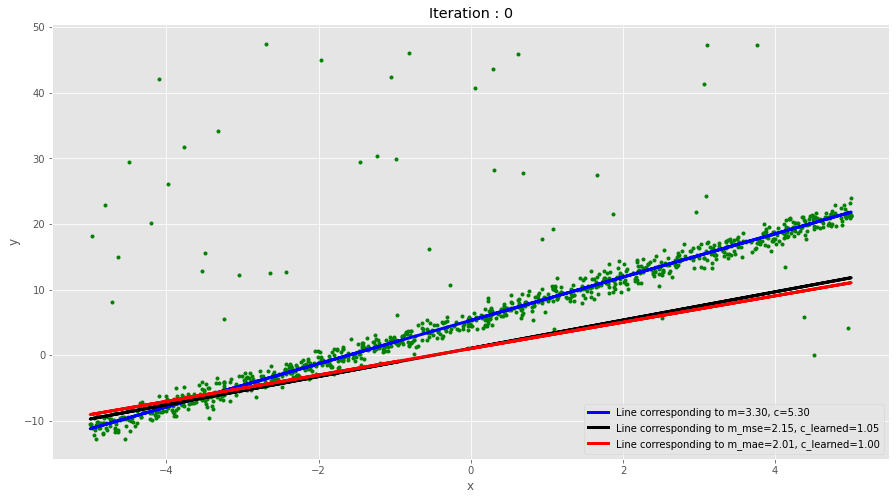

Iteration: 40, 
Loss_mse: 46.865, m_mse: 3.064, c_mse: 2.613
Loss_mae: 5.393, m_mae: 2.233,c_mae: 1.146


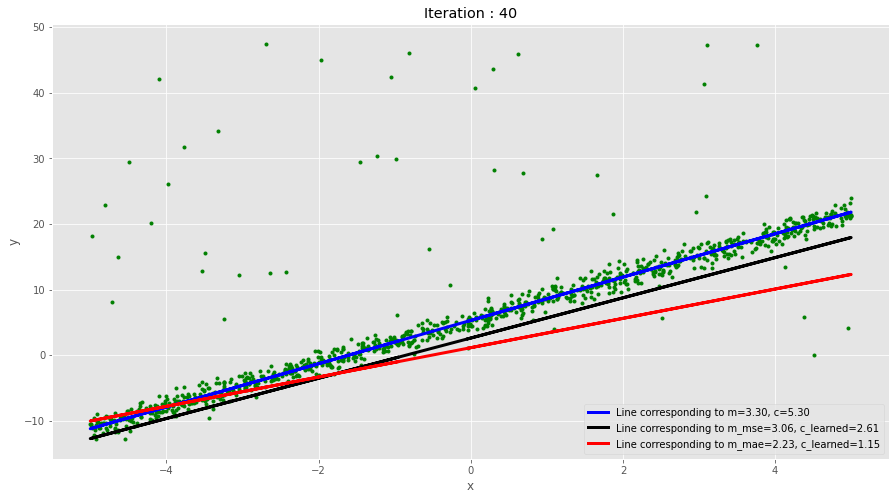

Iteration: 80, 
Loss_mse: 38.914, m_mse: 3.091, c_mse: 3.942
Loss_mae: 5.145, m_mae: 2.396,c_mae: 1.301


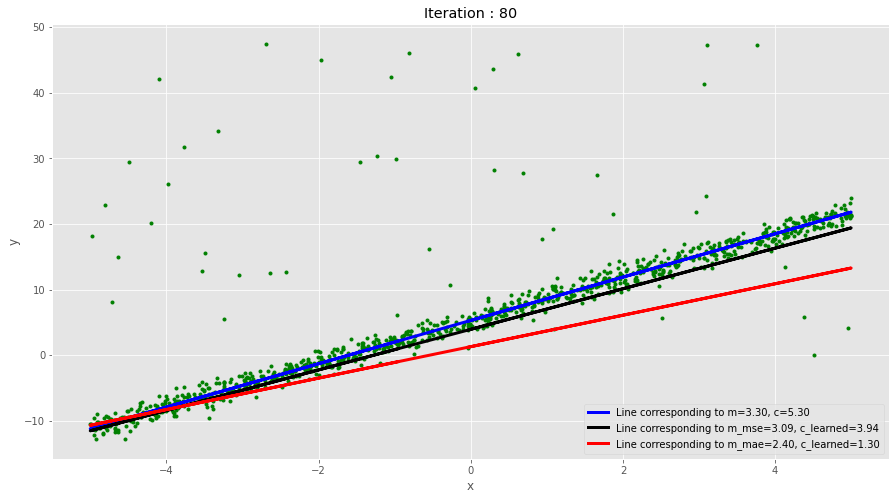

Iteration: 100, 
Loss_mse: 36.816, m_mse: 2.920, c_mse: 4.492
Loss_mae: 5.028, m_mae: 2.480,c_mae: 1.390


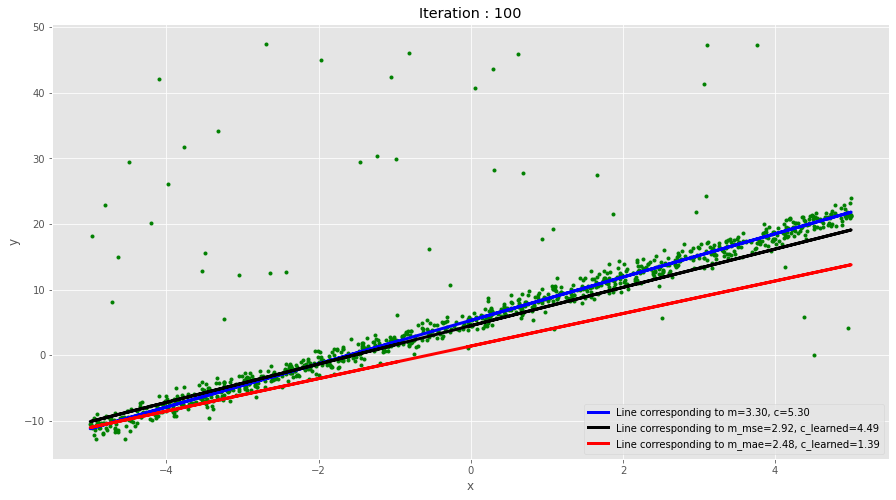

Iteration: 140, 
Loss_mse: 35.186, m_mse: 2.904, c_mse: 5.047
Loss_mae: 4.857, m_mae: 2.514,c_mae: 1.567


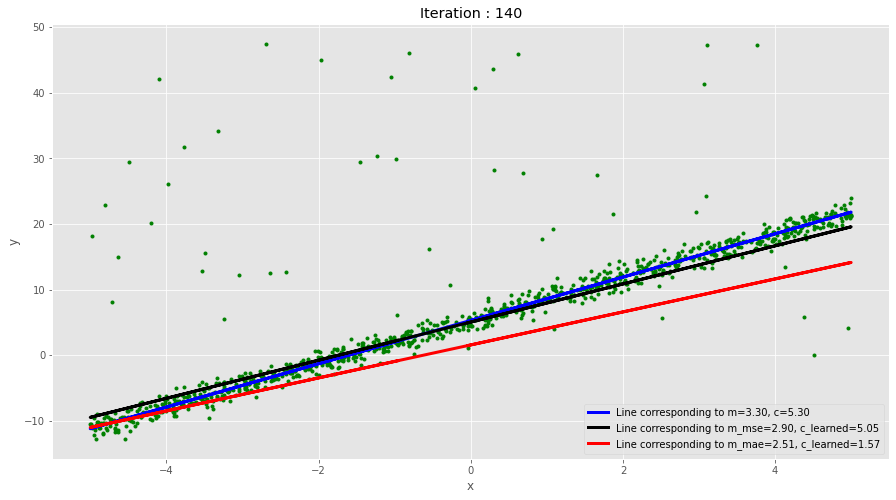

Iteration: 180, 
Loss_mse: 34.850, m_mse: 3.310, c_mse: 5.354
Loss_mae: 4.658, m_mae: 2.620,c_mae: 1.747


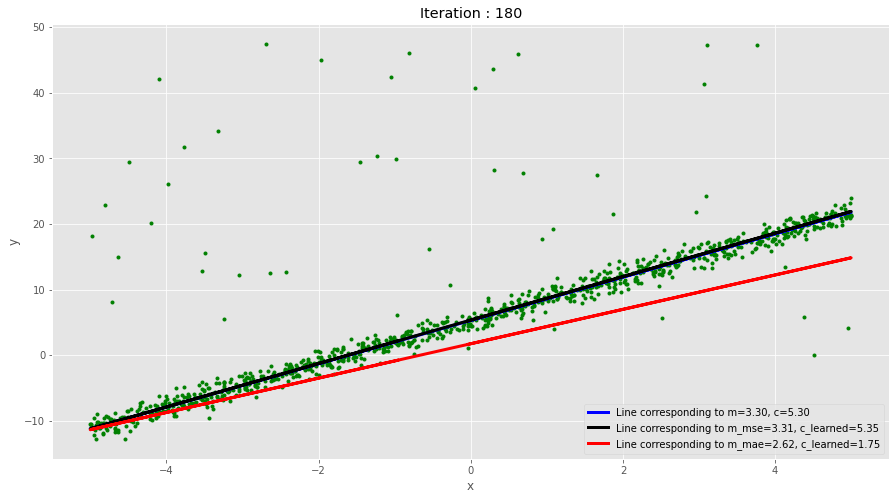

Iteration: 200, 
Loss_mse: 35.332, m_mse: 2.662, c_mse: 5.565
Loss_mae: 4.589, m_mae: 2.607,c_mae: 1.828


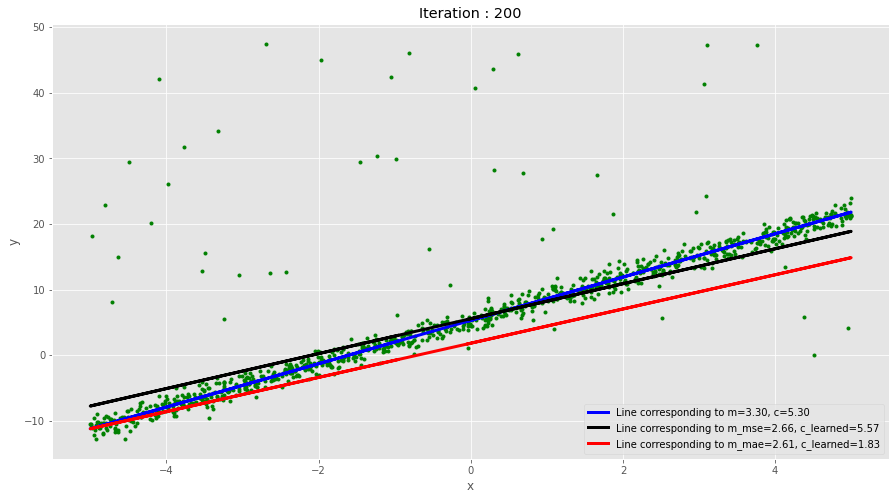

Iteration: 240, 
Loss_mse: 33.756, m_mse: 3.057, c_mse: 5.740
Loss_mae: 4.425, m_mae: 2.659,c_mae: 1.991


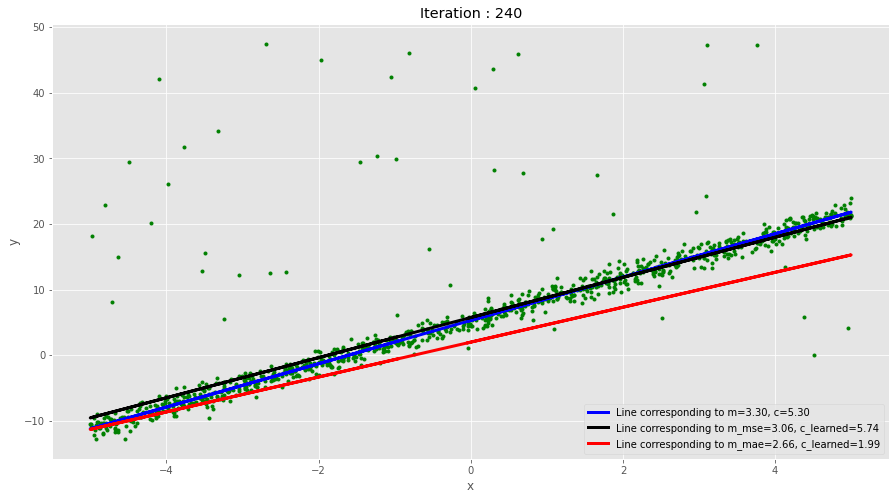

Iteration: 280, 
Loss_mse: 33.826, m_mse: 2.904, c_mse: 5.893
Loss_mae: 4.234, m_mae: 2.751,c_mae: 2.170


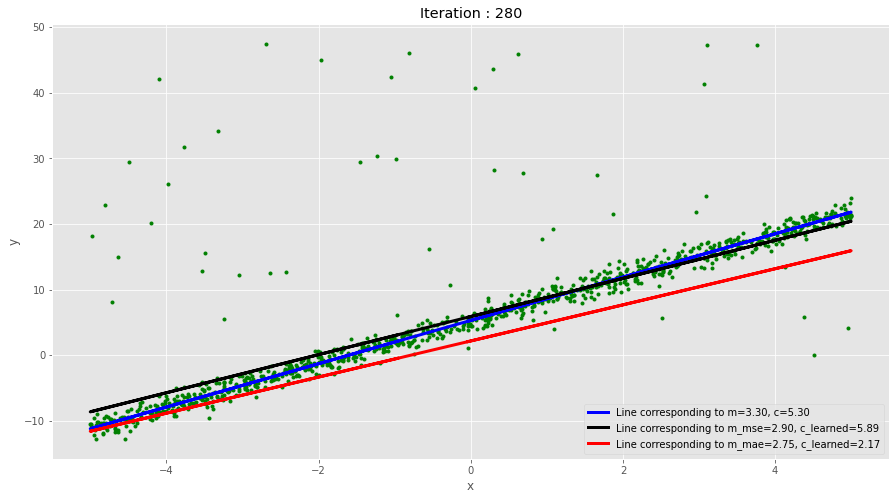

Iteration: 300, 
Loss_mse: 33.683, m_mse: 3.194, c_mse: 6.034
Loss_mae: 4.134, m_mae: 2.808,c_mae: 2.263


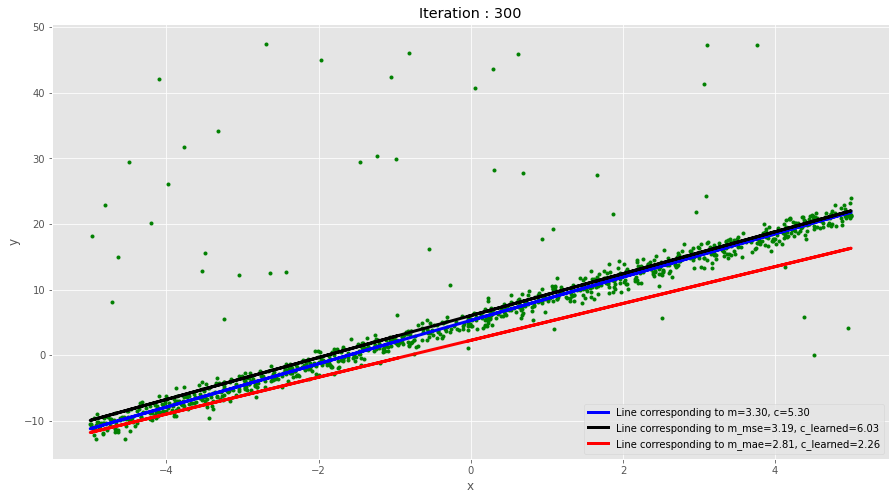

Iteration: 340, 
Loss_mse: 33.481, m_mse: 3.036, c_mse: 6.216
Loss_mae: 3.945, m_mae: 2.871,c_mae: 2.454


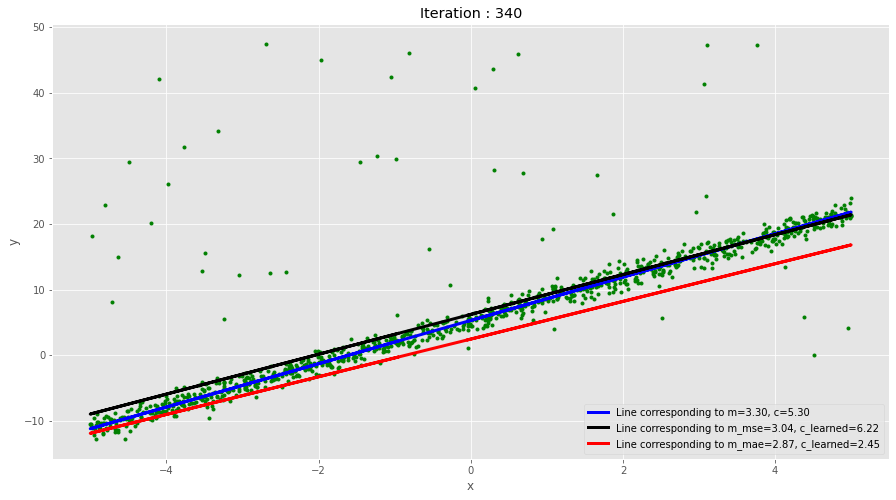

Iteration: 380, 
Loss_mse: 33.510, m_mse: 2.993, c_mse: 6.280
Loss_mae: 3.759, m_mae: 2.935,c_mae: 2.640


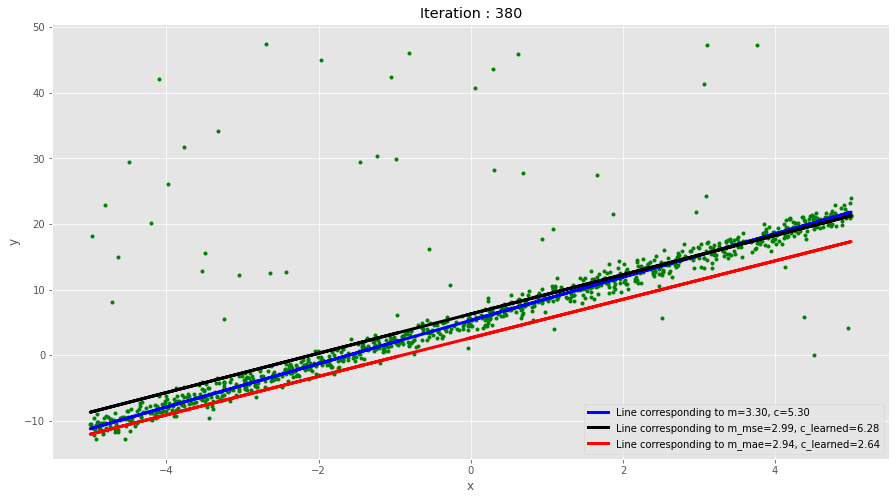

Iteration: 400, 
Loss_mse: 33.522, m_mse: 2.984, c_mse: 6.268
Loss_mae: 3.667, m_mae: 2.975,c_mae: 2.732


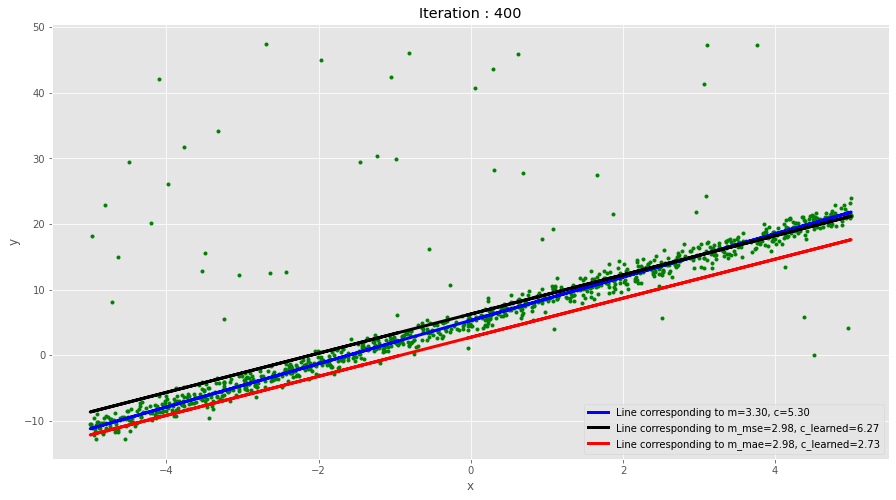

Iteration: 440, 
Loss_mse: 33.568, m_mse: 3.164, c_mse: 6.311
Loss_mae: 3.492, m_mae: 2.996,c_mae: 2.917


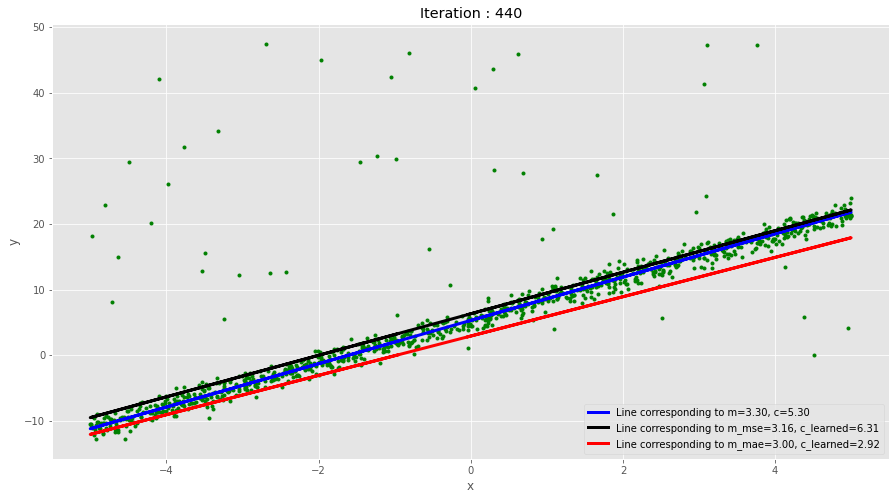

Iteration: 480, 
Loss_mse: 33.498, m_mse: 3.096, c_mse: 6.390
Loss_mae: 3.318, m_mae: 3.008,c_mae: 3.105


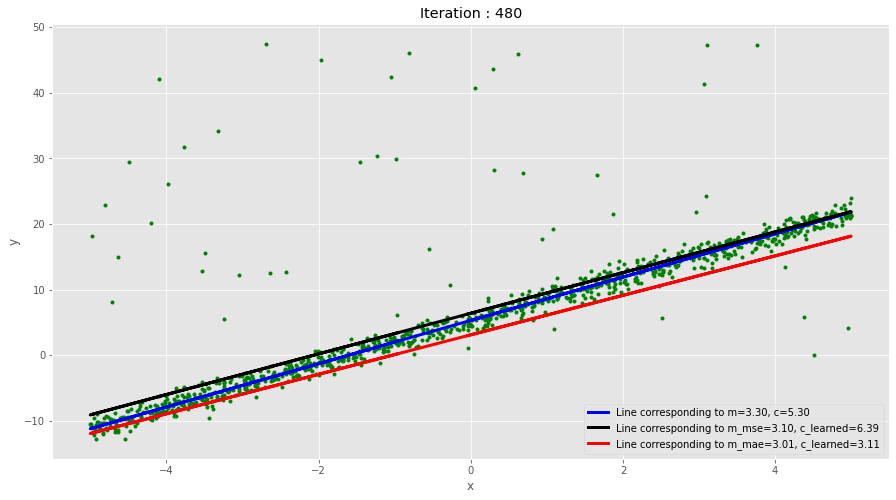

Iteration: 500, 
Loss_mse: 33.584, m_mse: 2.950, c_mse: 6.364
Loss_mae: 3.236, m_mae: 3.013,c_mae: 3.194


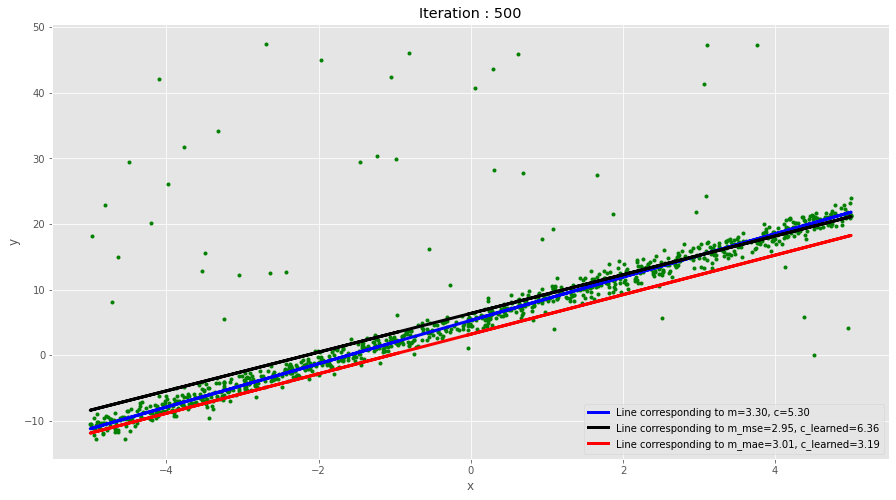

Iteration: 540, 
Loss_mse: 33.656, m_mse: 2.940, c_mse: 6.519
Loss_mae: 3.063, m_mae: 3.035,c_mae: 3.380


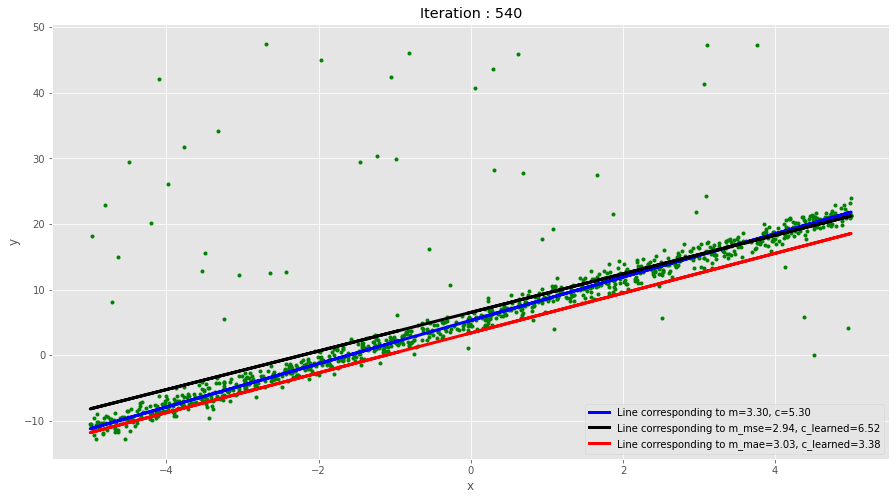

Iteration: 580, 
Loss_mse: 33.612, m_mse: 3.185, c_mse: 6.341
Loss_mae: 2.896, m_mae: 3.082,c_mae: 3.553


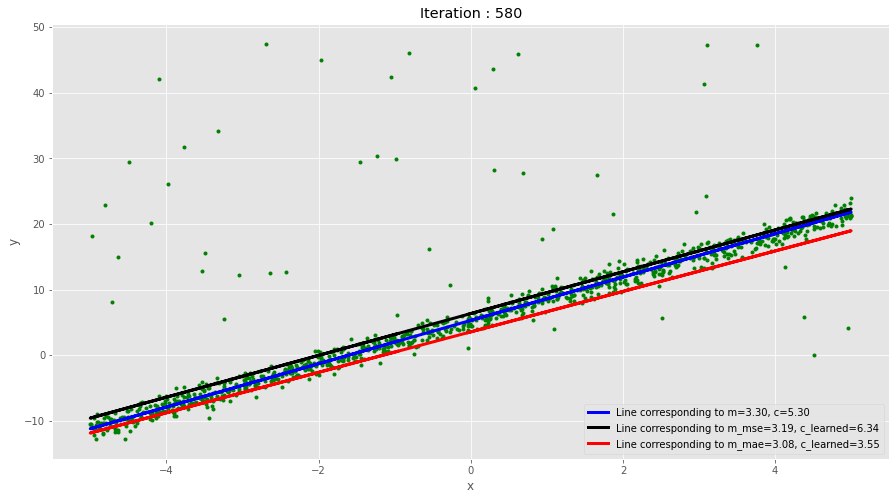

Iteration: 600, 
Loss_mse: 33.539, m_mse: 3.148, c_mse: 6.272
Loss_mae: 2.820, m_mae: 3.080,c_mae: 3.641


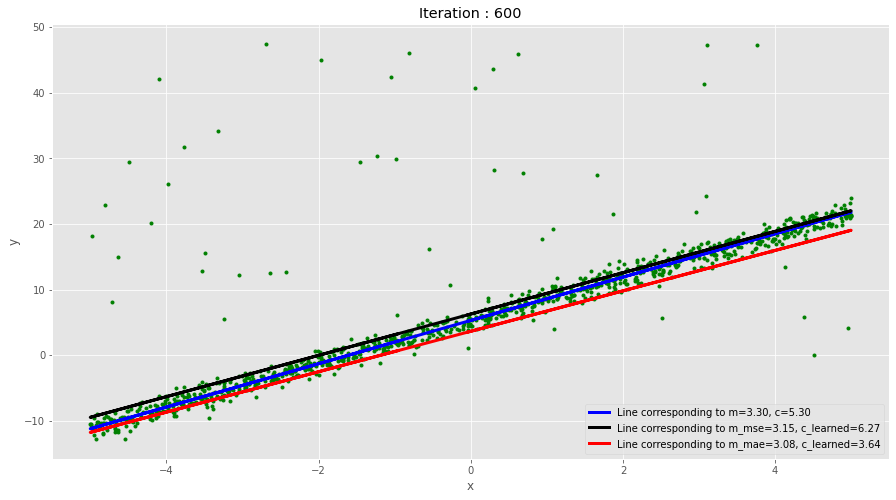

Iteration: 640, 
Loss_mse: 33.693, m_mse: 2.904, c_mse: 6.390
Loss_mae: 2.672, m_mae: 3.092,c_mae: 3.812


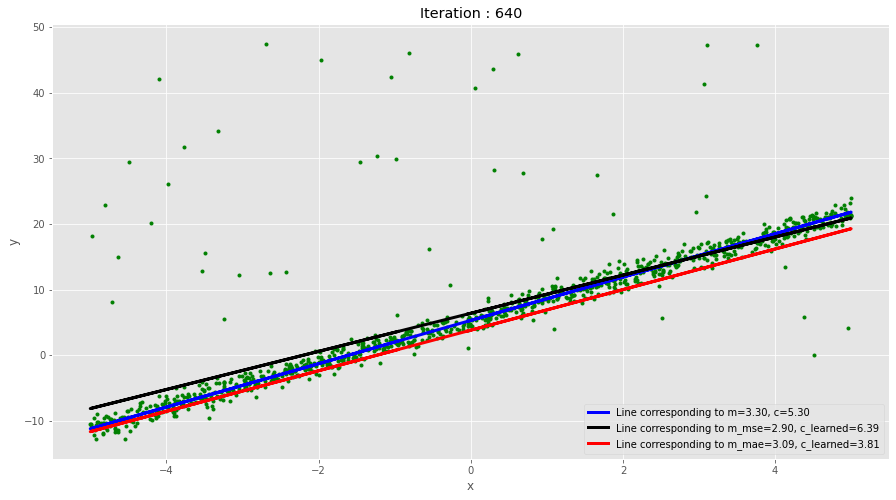

Iteration: 680, 
Loss_mse: 33.480, m_mse: 3.072, c_mse: 6.352
Loss_mae: 2.519, m_mae: 3.160,c_mae: 3.972


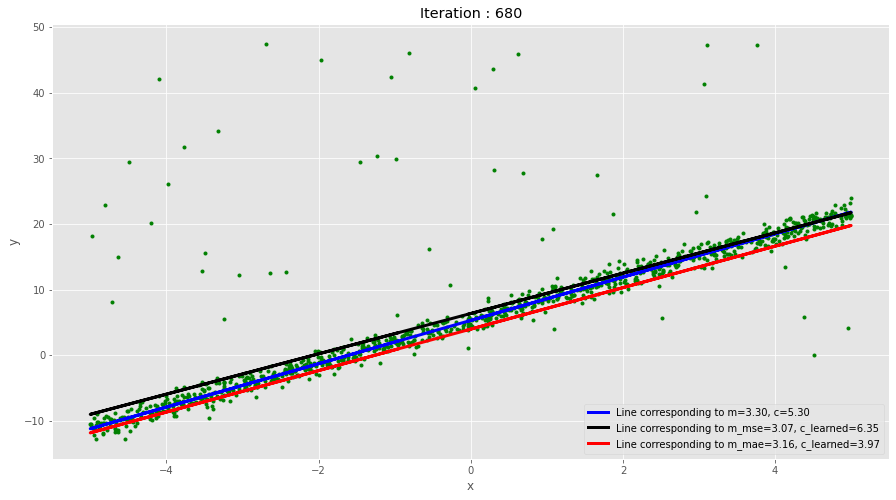

Iteration: 700, 
Loss_mse: 33.474, m_mse: 3.068, c_mse: 6.295
Loss_mae: 2.447, m_mae: 3.206,c_mae: 4.050


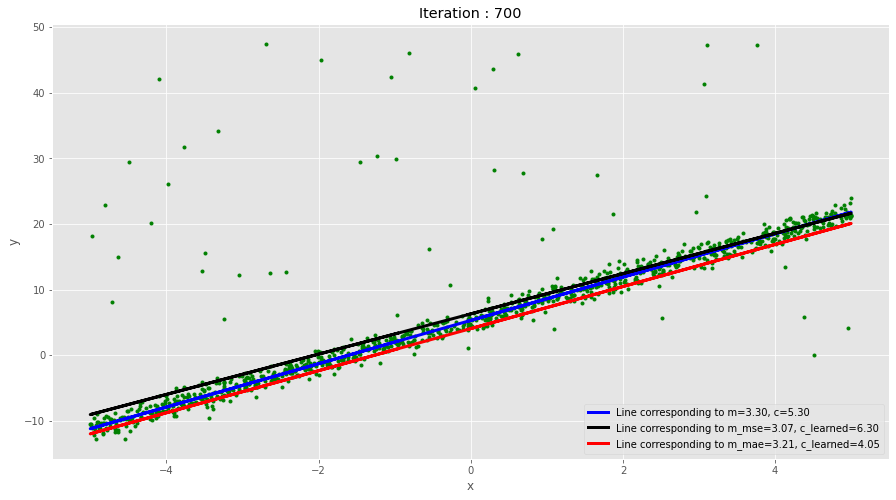

Iteration: 740, 
Loss_mse: 33.516, m_mse: 3.056, c_mse: 6.480
Loss_mae: 2.324, m_mae: 3.209,c_mae: 4.207


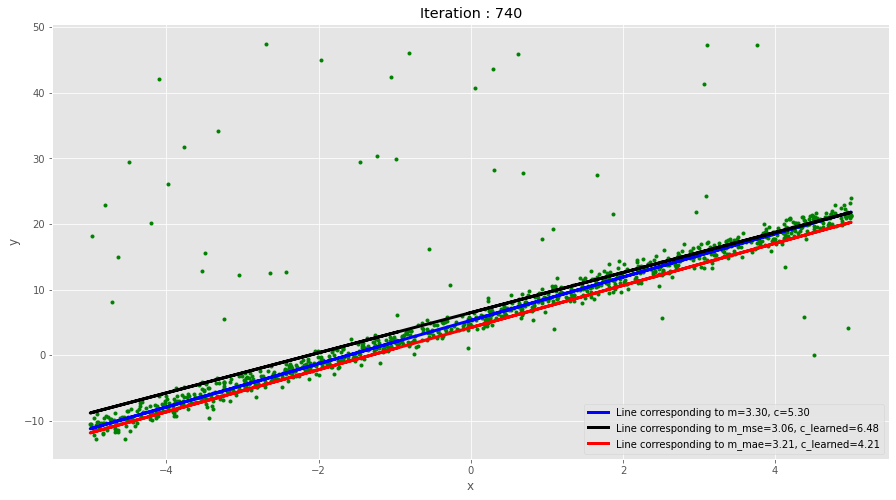

Iteration: 780, 
Loss_mse: 33.683, m_mse: 2.908, c_mse: 6.389
Loss_mae: 2.214, m_mae: 3.254,c_mae: 4.348


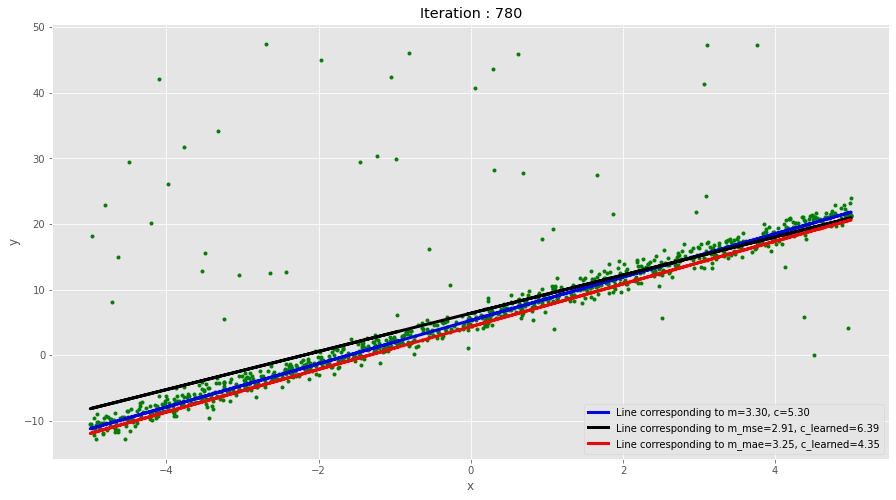

Iteration: 800, 
Loss_mse: 33.564, m_mse: 3.163, c_mse: 6.268
Loss_mae: 2.162, m_mae: 3.268,c_mae: 4.423


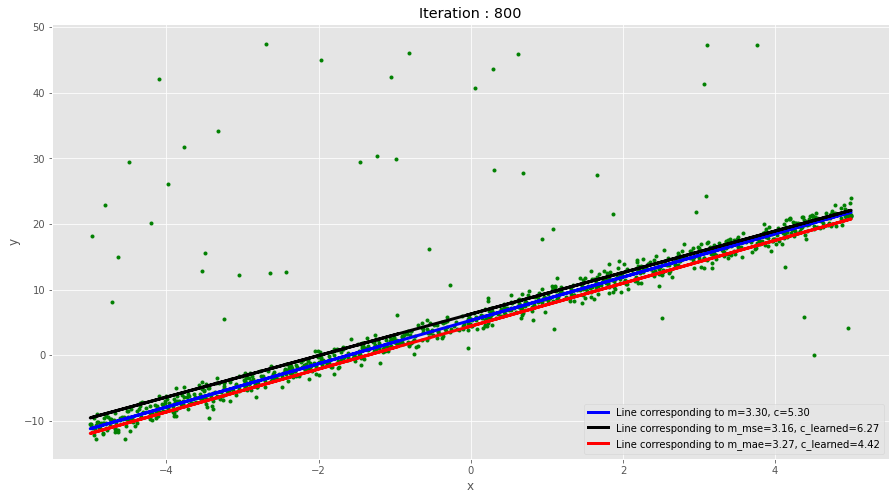

Iteration: 840, 
Loss_mse: 34.554, m_mse: 3.415, c_mse: 6.305
Loss_mae: 2.080, m_mae: 3.273,c_mae: 4.551


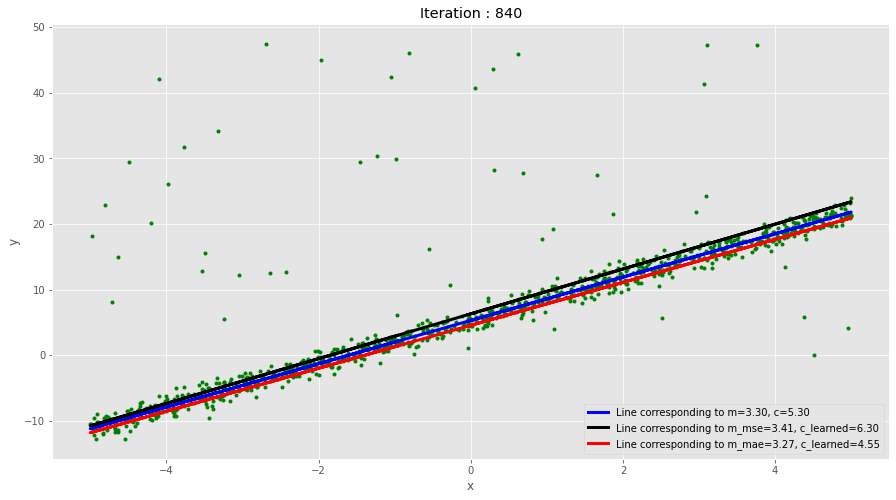

Iteration: 880, 
Loss_mse: 33.535, m_mse: 3.145, c_mse: 6.299
Loss_mae: 2.013, m_mae: 3.262,c_mae: 4.669


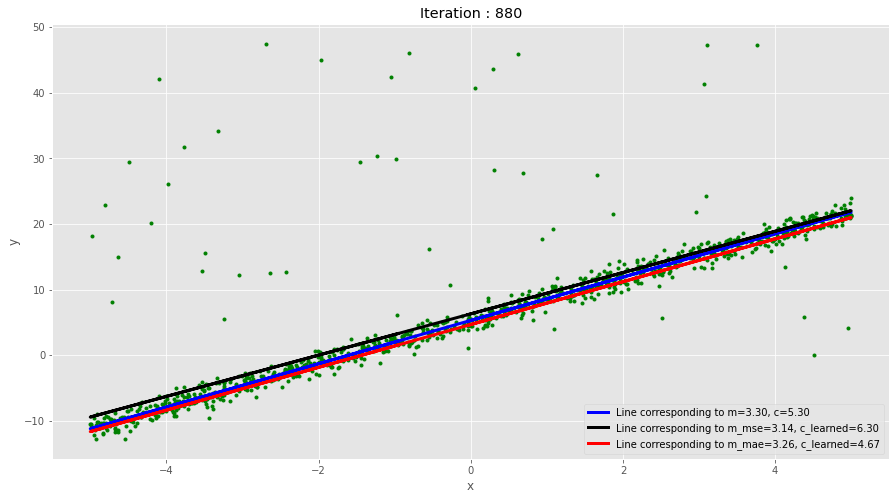

Iteration: 900, 
Loss_mse: 33.473, m_mse: 3.051, c_mse: 6.286
Loss_mae: 1.986, m_mae: 3.267,c_mae: 4.722


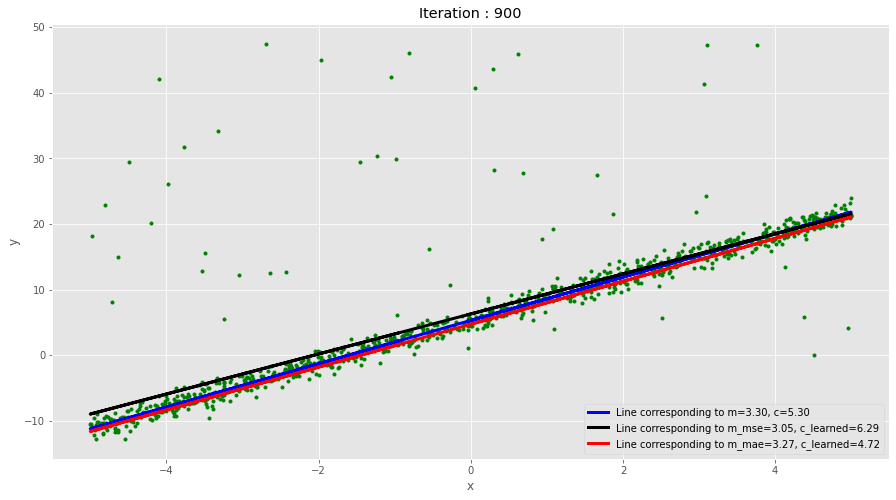

Iteration: 940, 
Loss_mse: 33.535, m_mse: 3.002, c_mse: 6.459
Loss_mae: 1.949, m_mae: 3.230,c_mae: 4.823


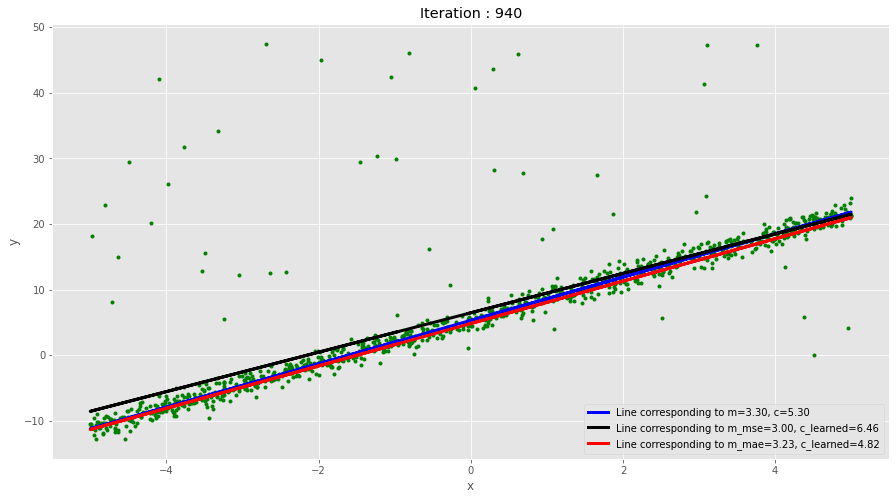

Iteration: 980, 
Loss_mse: 33.497, m_mse: 3.040, c_mse: 6.420
Loss_mae: 1.915, m_mae: 3.279,c_mae: 4.890


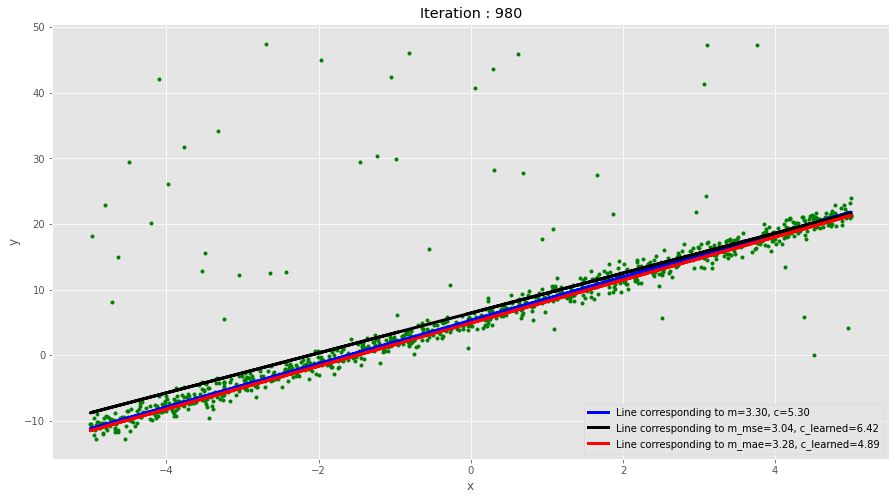

Iteration: 1000, 
Loss_mse: 33.595, m_mse: 3.169, c_mse: 6.414
Loss_mae: 1.905, m_mae: 3.307,c_mae: 4.929


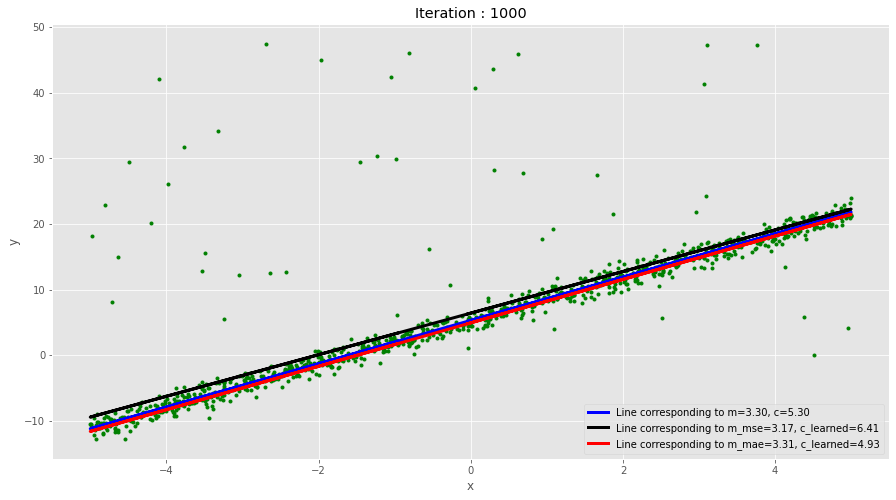

Iteration: 1040, 
Loss_mse: 34.150, m_mse: 3.339, c_mse: 6.364
Loss_mae: 1.886, m_mae: 3.279,c_mae: 4.986


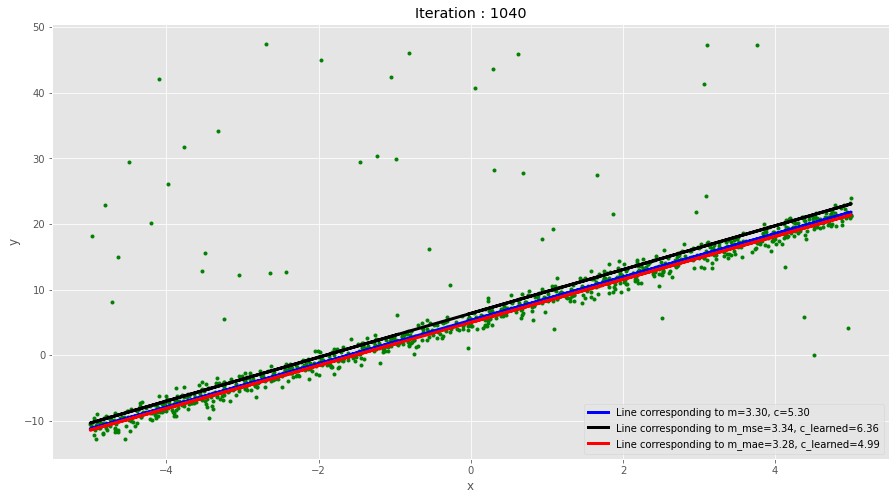

Iteration: 1080, 
Loss_mse: 33.668, m_mse: 3.207, c_mse: 6.372
Loss_mae: 1.871, m_mae: 3.289,c_mae: 5.044


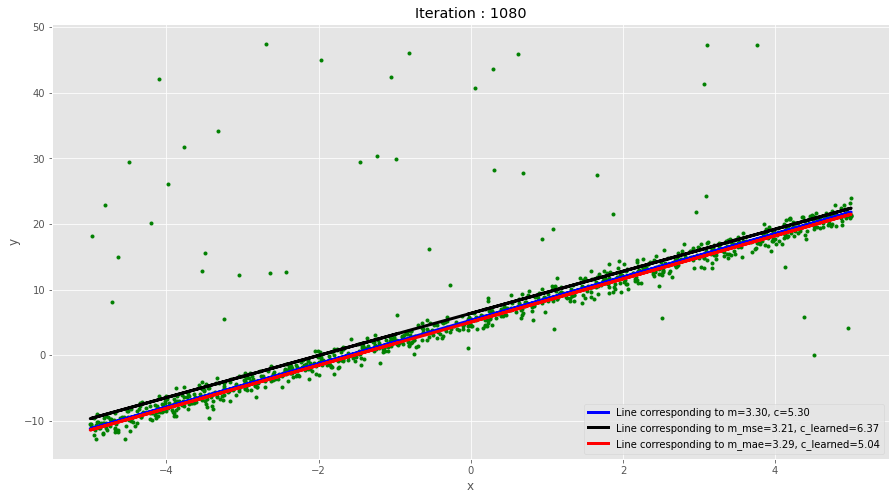

Iteration: 1100, 
Loss_mse: 33.666, m_mse: 3.207, c_mse: 6.358
Loss_mae: 1.866, m_mae: 3.297,c_mae: 5.068


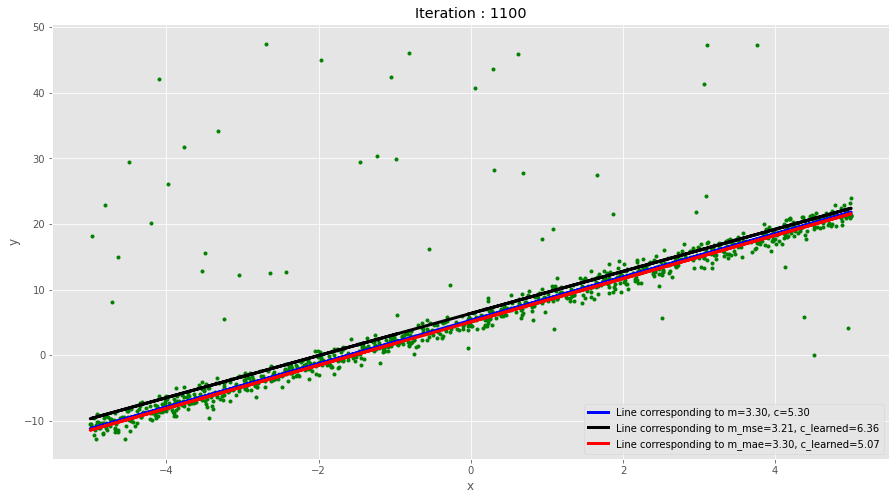

Iteration: 1140, 
Loss_mse: 34.529, m_mse: 2.714, c_mse: 6.454
Loss_mae: 1.861, m_mae: 3.253,c_mae: 5.107


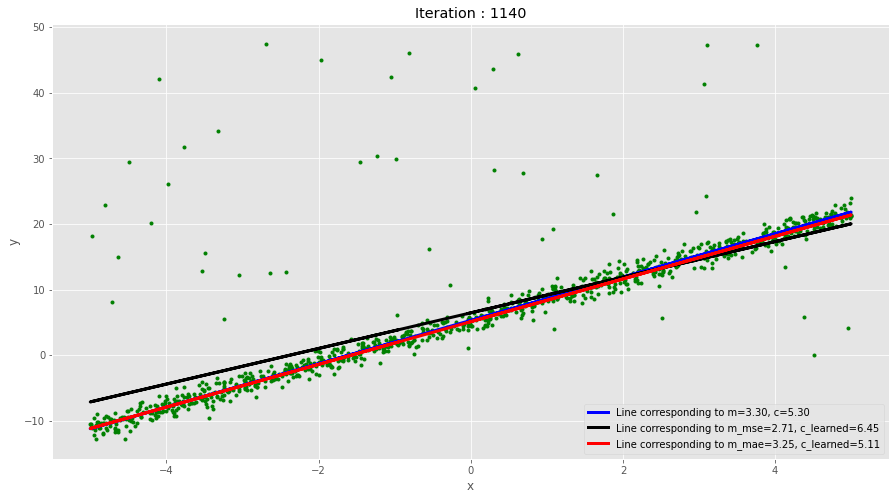

Iteration: 1180, 
Loss_mse: 33.606, m_mse: 3.183, c_mse: 6.335
Loss_mae: 1.852, m_mae: 3.308,c_mae: 5.148


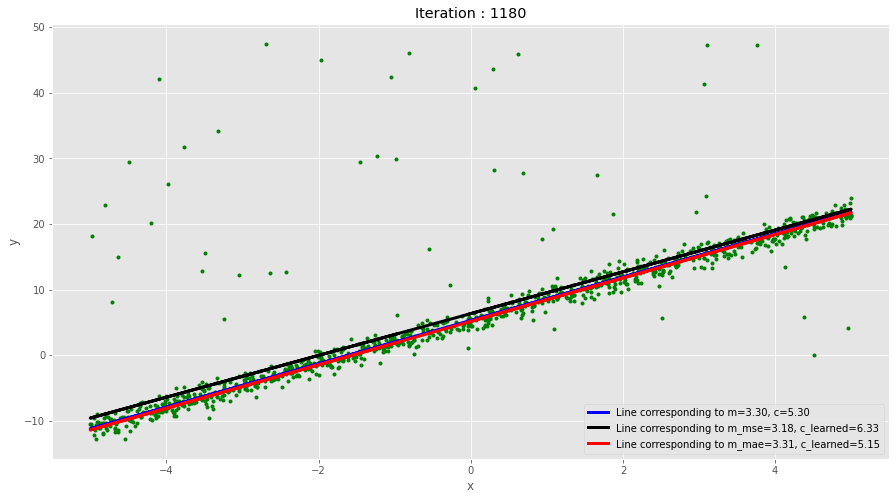

Iteration: 1200, 
Loss_mse: 33.604, m_mse: 3.183, c_mse: 6.306
Loss_mae: 1.847, m_mae: 3.293,c_mae: 5.174


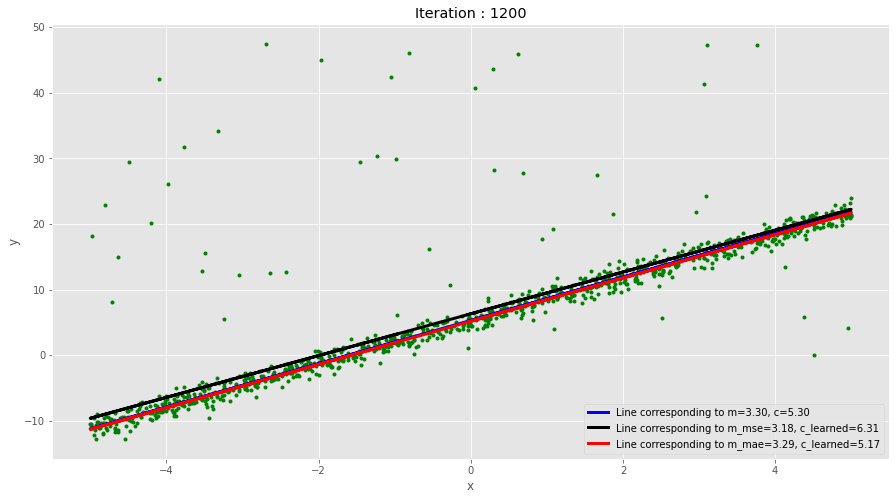

Iteration: 1240, 
Loss_mse: 33.502, m_mse: 3.084, c_mse: 6.428
Loss_mae: 1.844, m_mae: 3.311,c_mae: 5.214


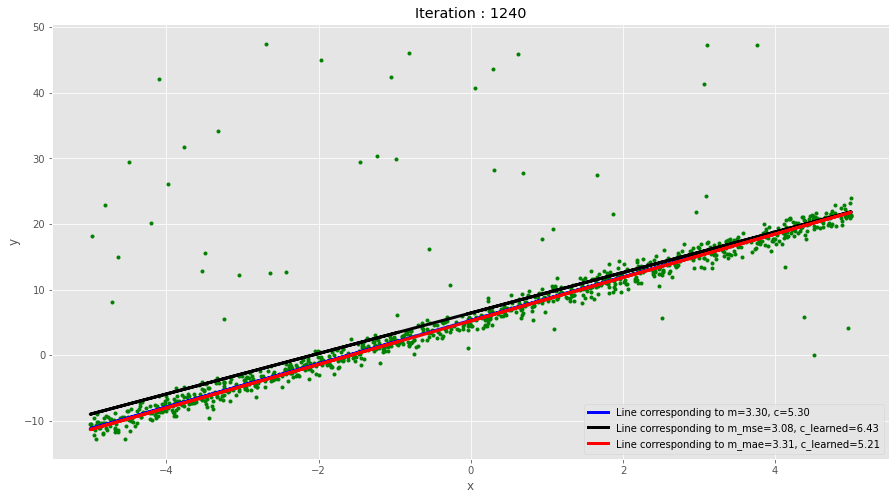

Iteration: 1280, 
Loss_mse: 33.491, m_mse: 3.104, c_mse: 6.232
Loss_mae: 1.841, m_mae: 3.284,c_mae: 5.223


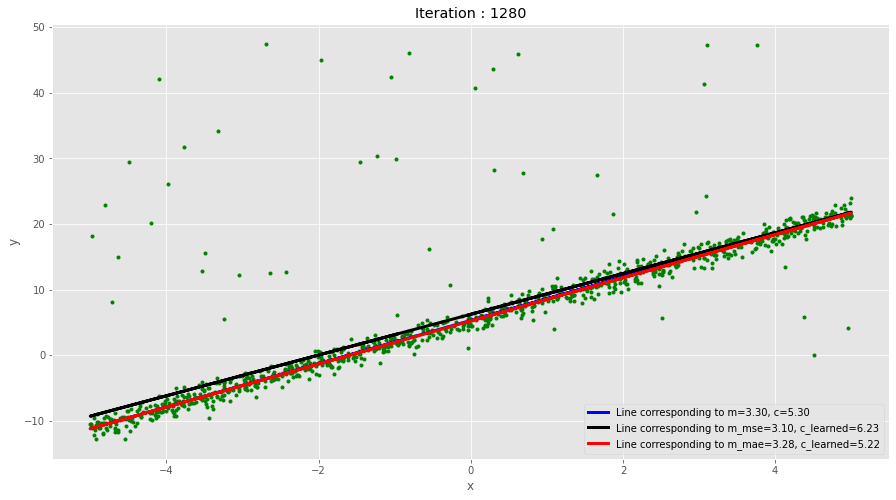

Iteration: 1300, 
Loss_mse: 33.492, m_mse: 3.014, c_mse: 6.238
Loss_mae: 1.840, m_mae: 3.302,c_mae: 5.239


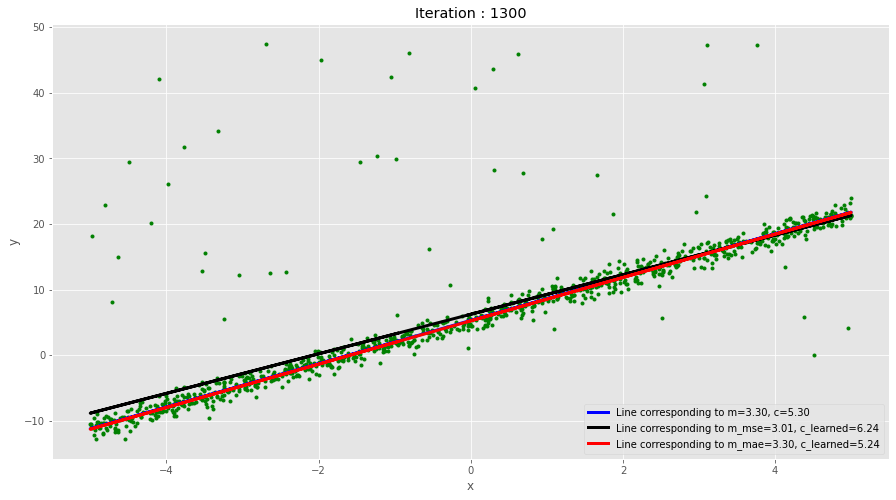

Iteration: 1340, 
Loss_mse: 33.520, m_mse: 2.989, c_mse: 6.337
Loss_mae: 1.838, m_mae: 3.274,c_mae: 5.262


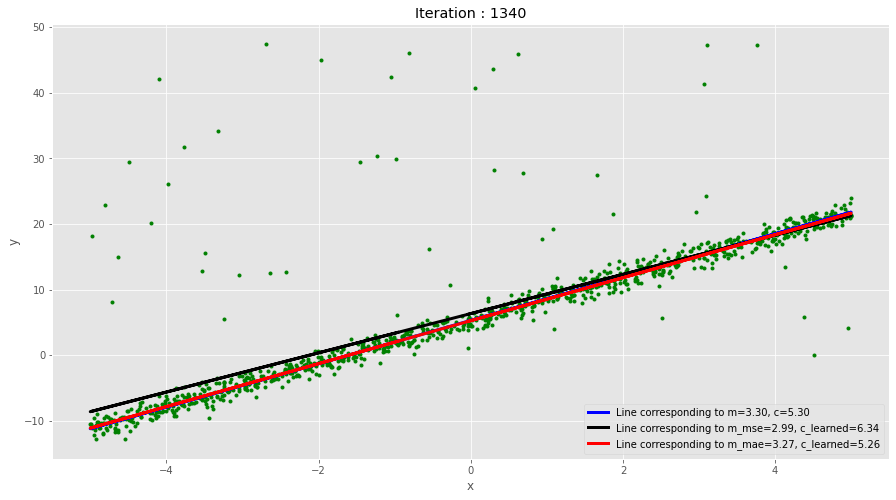

Iteration: 1380, 
Loss_mse: 34.094, m_mse: 3.329, c_mse: 6.292
Loss_mae: 1.839, m_mae: 3.304,c_mae: 5.261


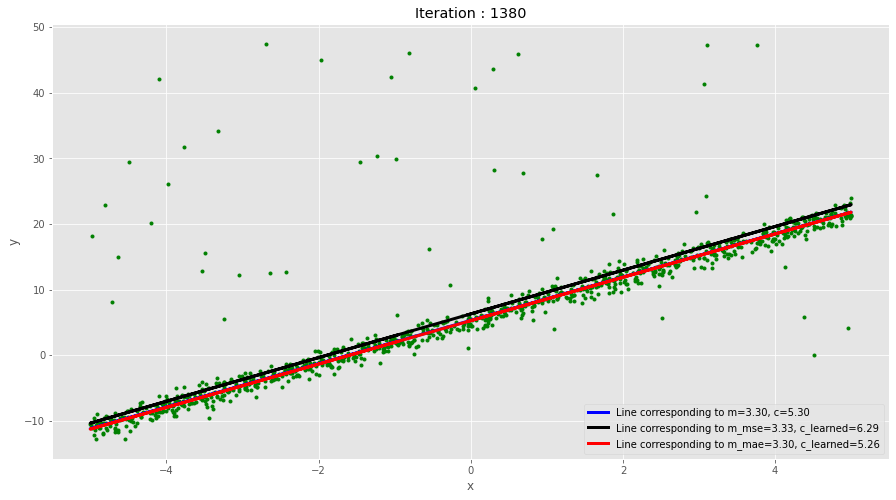

Iteration: 1400, 
Loss_mse: 33.482, m_mse: 3.032, c_mse: 6.221
Loss_mae: 1.838, m_mae: 3.293,c_mae: 5.262


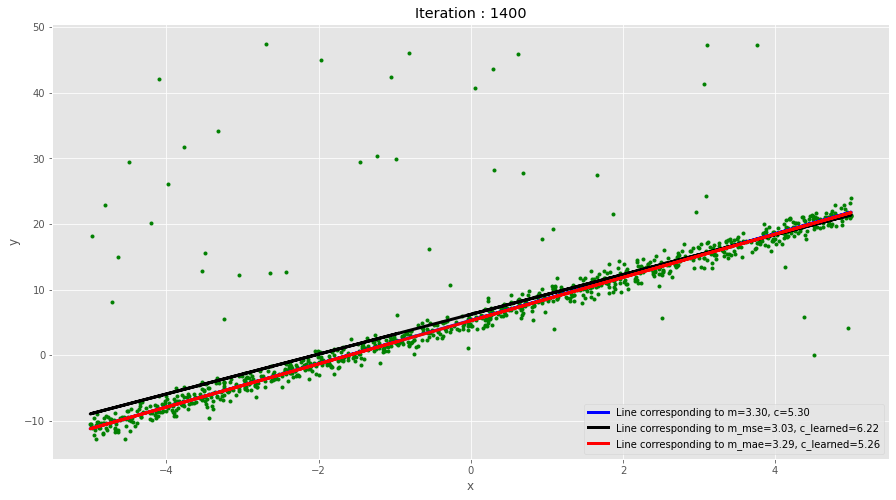

Iteration: 1440, 
Loss_mse: 33.534, m_mse: 3.133, c_mse: 6.149
Loss_mae: 1.838, m_mae: 3.298,c_mae: 5.262


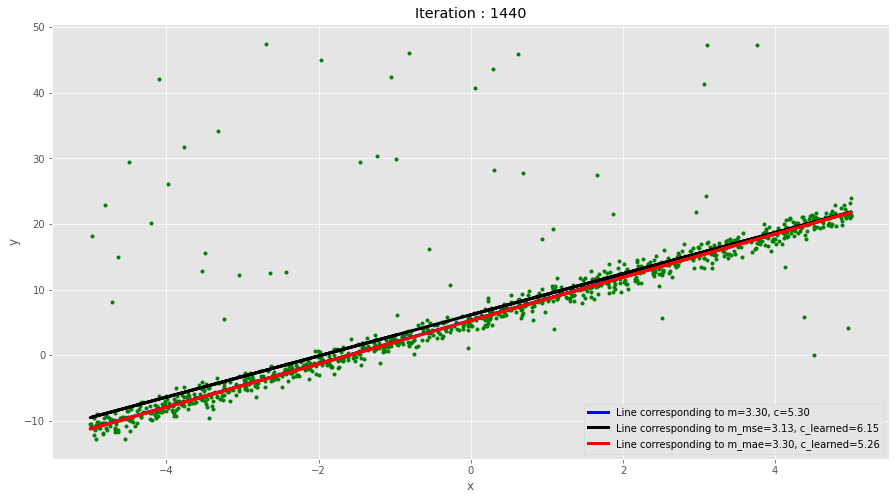

Iteration: 1480, 
Loss_mse: 33.994, m_mse: 2.813, c_mse: 6.274
Loss_mae: 1.836, m_mae: 3.283,c_mae: 5.282


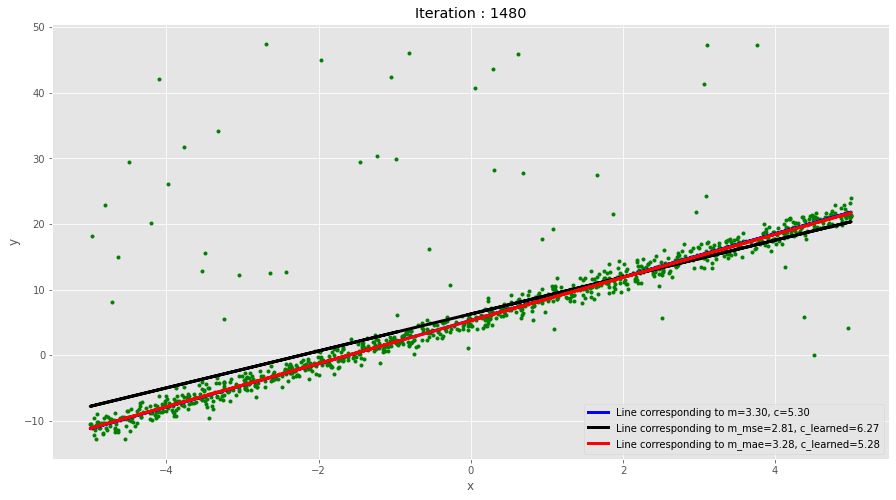

Iteration: 1500, 
Loss_mse: 35.430, m_mse: 2.585, c_mse: 6.432
Loss_mae: 1.836, m_mae: 3.289,c_mae: 5.282


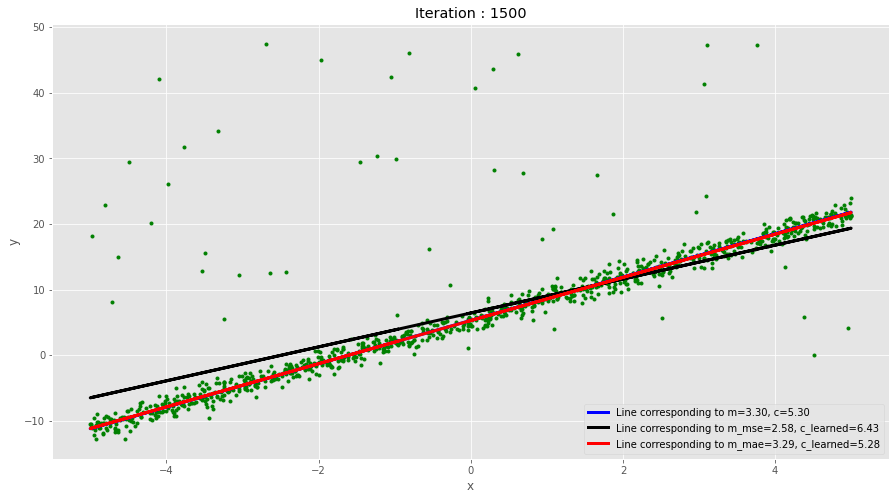

Iteration: 1540, 
Loss_mse: 33.810, m_mse: 2.861, c_mse: 6.286
Loss_mae: 1.836, m_mae: 3.270,c_mae: 5.295


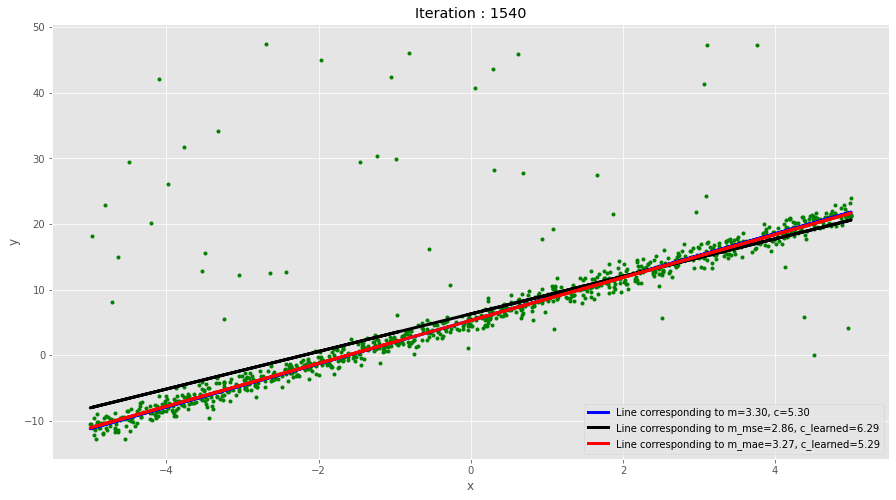

Iteration: 1580, 
Loss_mse: 33.717, m_mse: 2.893, c_mse: 6.194
Loss_mae: 1.840, m_mae: 3.245,c_mae: 5.288


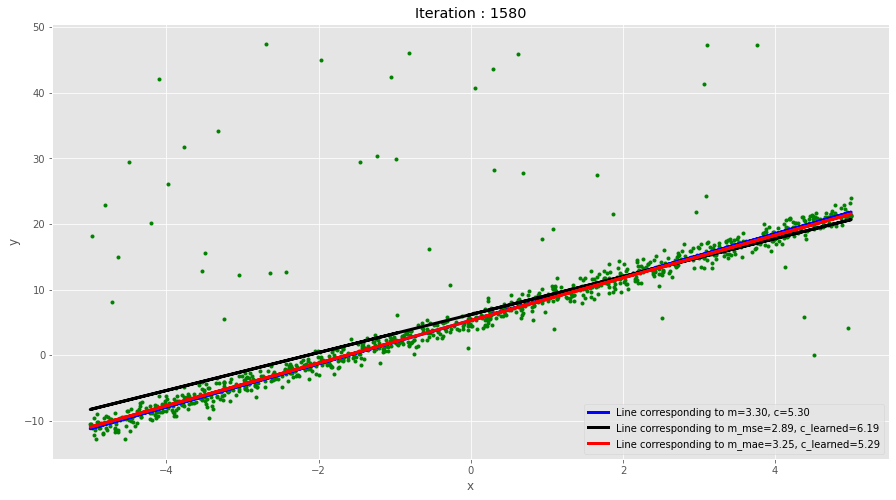

Iteration: 1600, 
Loss_mse: 33.578, m_mse: 2.949, c_mse: 6.246
Loss_mae: 1.838, m_mae: 3.251,c_mae: 5.300


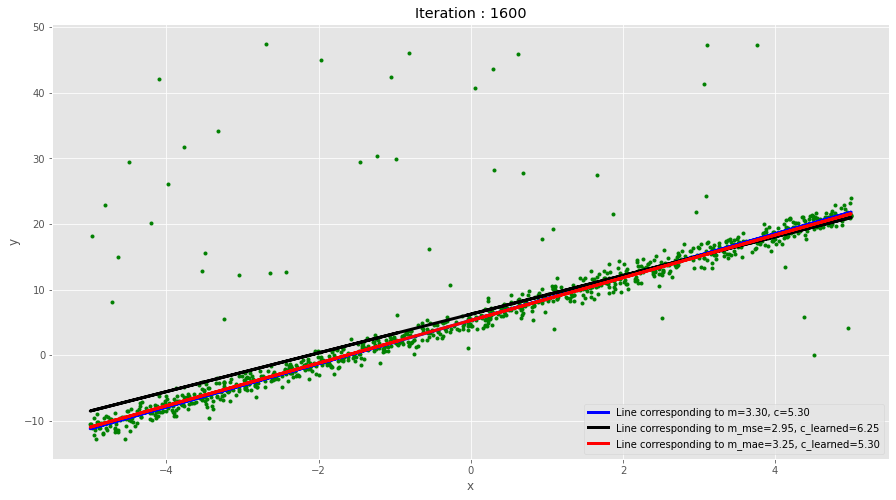

Iteration: 1640, 
Loss_mse: 33.594, m_mse: 3.168, c_mse: 6.127
Loss_mae: 1.835, m_mae: 3.289,c_mae: 5.310


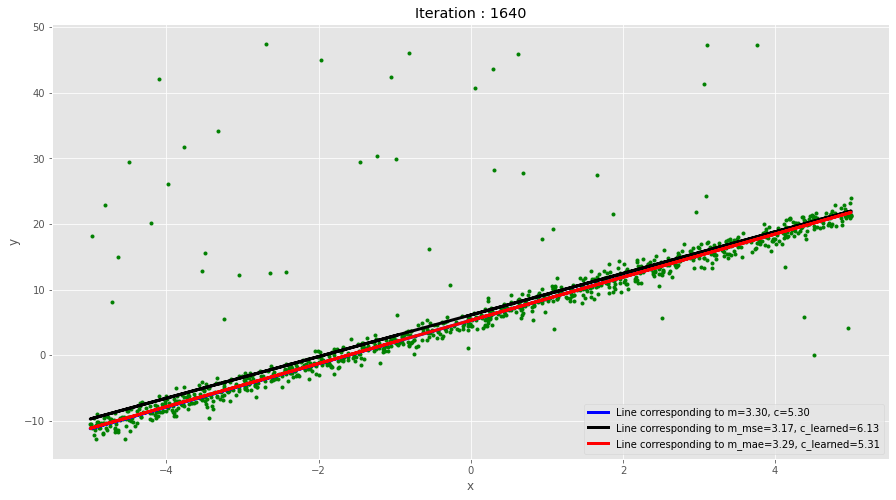

Iteration: 1680, 
Loss_mse: 33.670, m_mse: 3.185, c_mse: 6.019
Loss_mae: 1.835, m_mae: 3.283,c_mae: 5.309


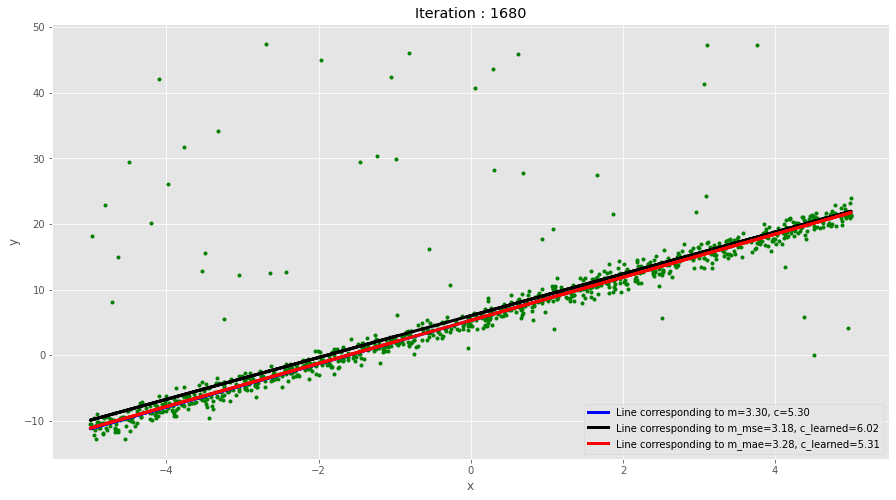

Iteration: 1700, 
Loss_mse: 33.633, m_mse: 3.191, c_mse: 6.156
Loss_mae: 1.835, m_mae: 3.289,c_mae: 5.316


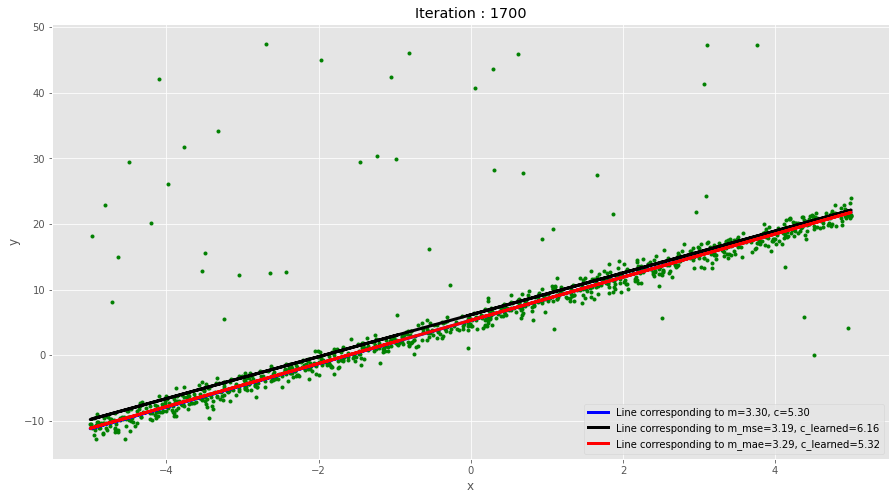

Iteration: 1740, 
Loss_mse: 33.726, m_mse: 3.220, c_mse: 6.092
Loss_mae: 1.838, m_mae: 3.308,c_mae: 5.311


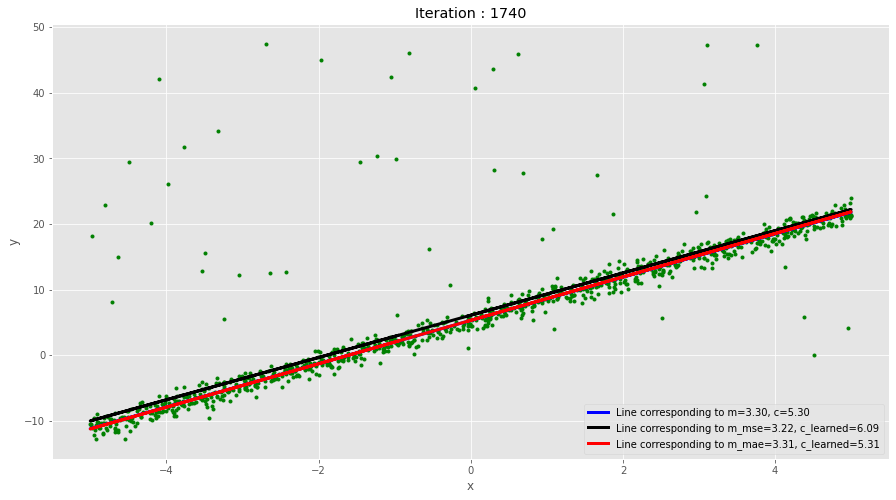

Iteration: 1780, 
Loss_mse: 33.522, m_mse: 3.120, c_mse: 6.140
Loss_mae: 1.835, m_mae: 3.289,c_mae: 5.311


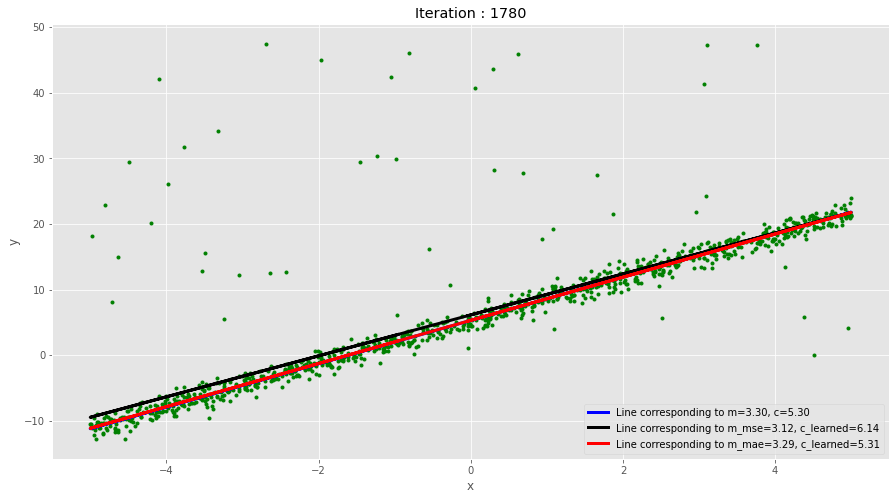

Iteration: 1800, 
Loss_mse: 33.812, m_mse: 3.250, c_mse: 6.106
Loss_mae: 1.835, m_mae: 3.288,c_mae: 5.314


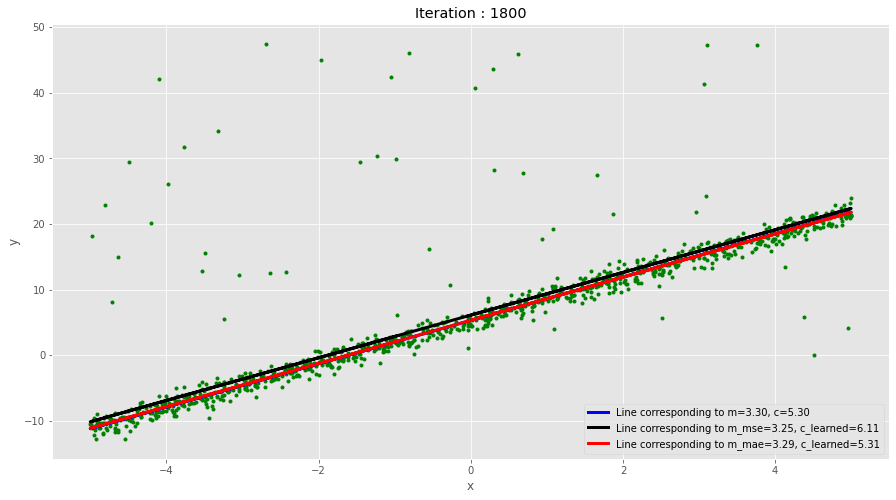

Iteration: 1840, 
Loss_mse: 33.517, m_mse: 2.999, c_mse: 6.160
Loss_mae: 1.836, m_mae: 3.259,c_mae: 5.324


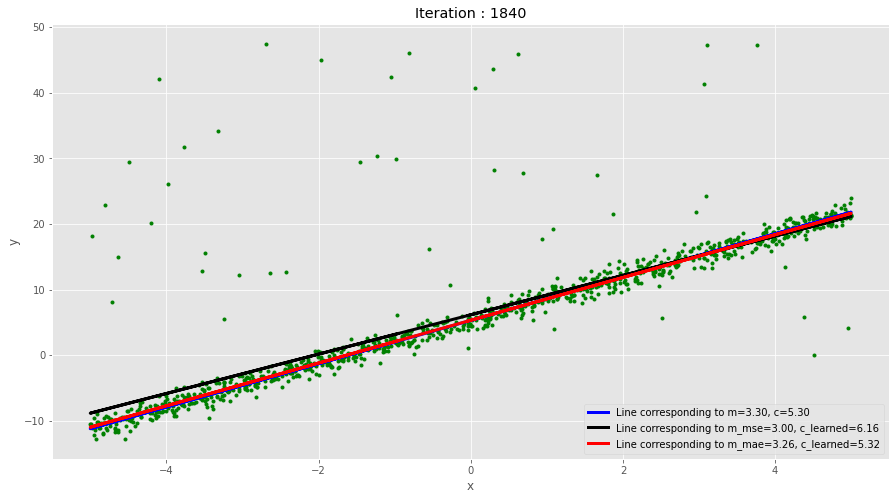

Iteration: 1880, 
Loss_mse: 33.628, m_mse: 2.925, c_mse: 6.283
Loss_mae: 1.838, m_mae: 3.250,c_mae: 5.322


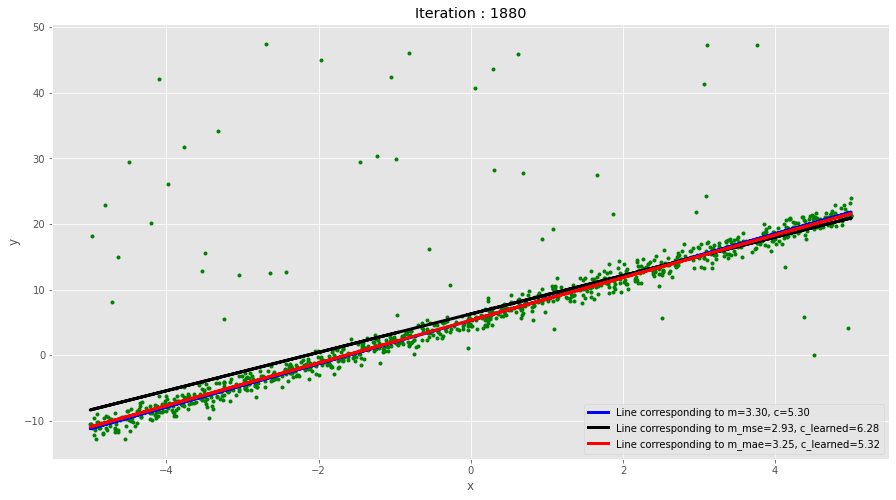

Iteration: 1900, 
Loss_mse: 33.618, m_mse: 2.932, c_mse: 6.203
Loss_mae: 1.836, m_mae: 3.263,c_mae: 5.312


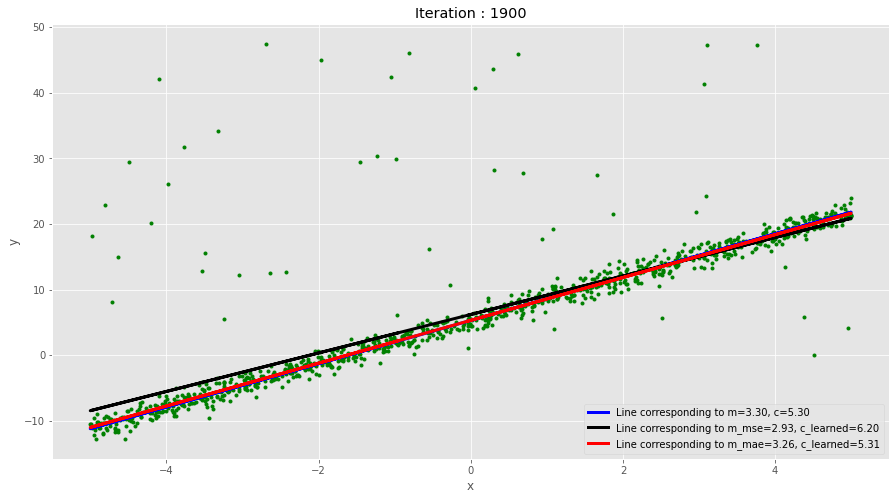

Iteration: 1940, 
Loss_mse: 33.602, m_mse: 2.940, c_mse: 6.359
Loss_mae: 1.839, m_mae: 3.244,c_mae: 5.326


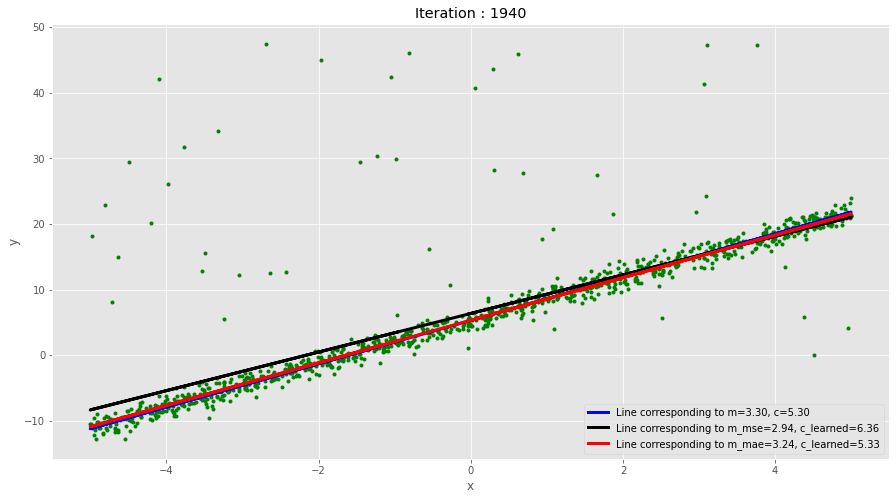

Iteration: 1980, 
Loss_mse: 33.540, m_mse: 3.144, c_mse: 6.353
Loss_mae: 1.835, m_mae: 3.289,c_mae: 5.319


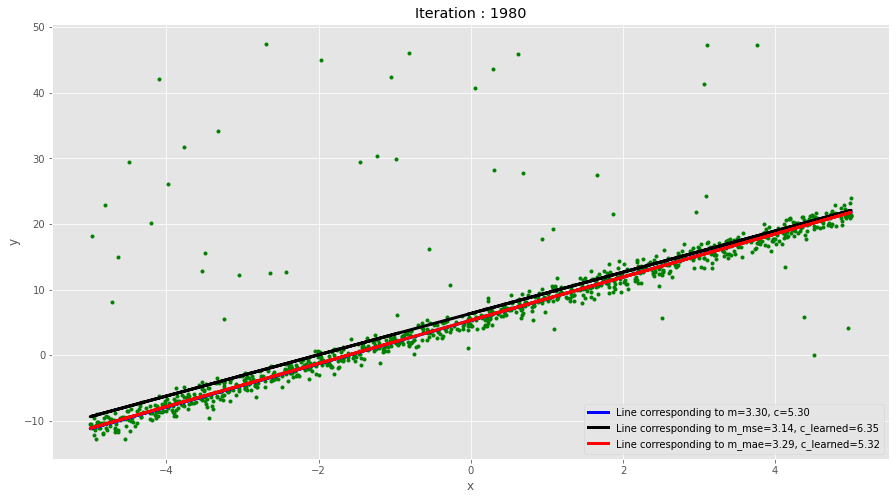

In [25]:
# inputs
inputs = x

# output/labels
labels = y_label

# labels around y
labels_origin = y

# epoch 
epoch=20

# learning rate
lr = 0.005

# batch size
batch_size=10

# dislpay plot count
display_count=40

# inital m
initial_m = 2

# initail c
initial_c = 1

grad_fun_m_c_list = [gradient_wrt_m_and_c_mse, gradient_wrt_m_and_c_mae]

loss_fun_list = [MSE_loss, MAE_loss]

m, c, loss, final_iteration = train(inputs, labels, labels_origin, initial_m, initial_c, grad_fun_m_c_list, 
                                    loss_fun_list, lr, batch_size, epoch, display_count)

--------------------------
Final plots
--------------------------
Iteration: 1999, 
Loss_mse: 33.576, m_mse: 3.160, c_mse: 6.406
Loss_mae: 1.836, m_mae: 3.294,c_mae: 5.325


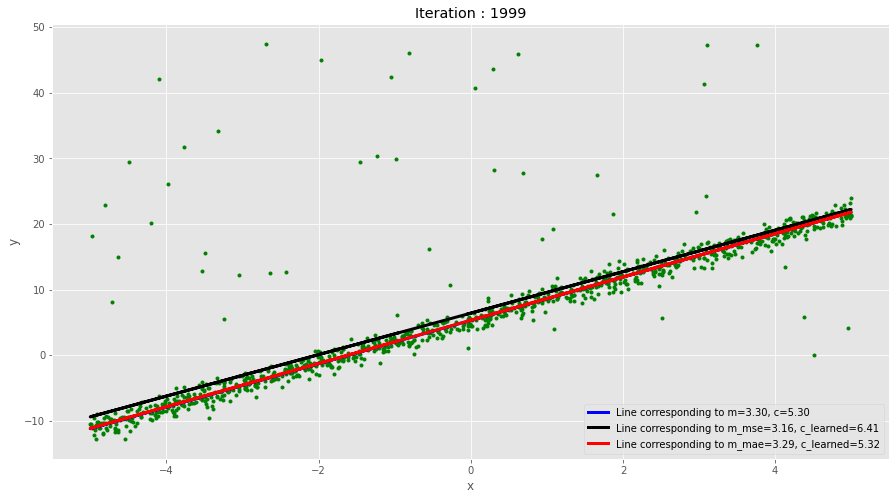

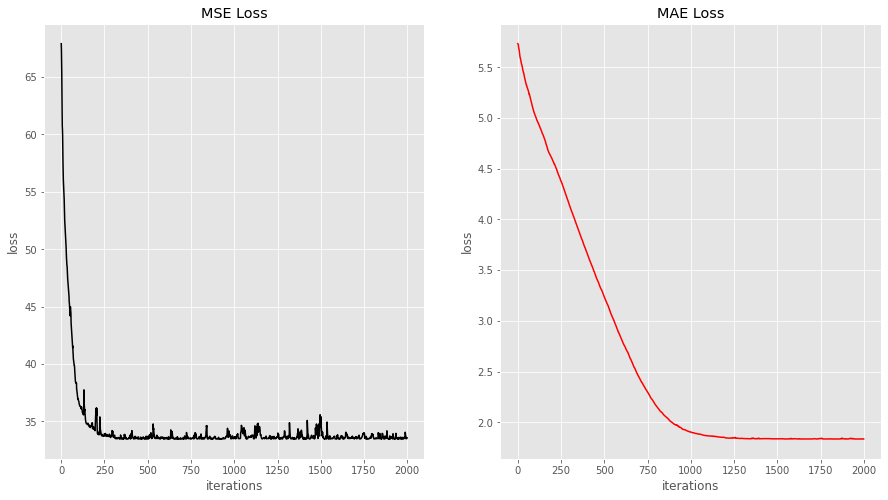

In [26]:
print('{0}\nFinal plots\n{0}'.format('--------------------------'))

display_training(inputs, labels_origin, labels, loss, m, c, iteration=final_iteration)

plot_loss(loss)


**In the above plot, we can observe that the line learned with mean square error deviated more compare to mean absolute error.**